## Imports

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import strftime
import numpy as np

import scrape_url_list as s
import acquire as a
import prepare as p
import explore as e
import modeling as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import unicodedata
import re

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
# sns.set_palette('viridis')

---

In [2]:
# links = s.get_cached_links()

In [3]:
# links = links[:-2]

---

In [4]:
# link_list = []
# for link in links:
#     response = requests.get(link, headers={"user-agent": "Codeup DS"})
#     link_list.append({'link' : link, 'status_code' : response.status_code})

In [5]:
# df = pd.DataFrame(link_list)

In [6]:
# df.head()

In [7]:
# df[df.status_code != 200]

**Takeaways from acquire:**
- The urls were fine when making requests, all returned status code of 200
- But when I tried to use Zach's acquire module to get the needed content, 5 links returned `404` errors
    - Still not sure exaxtly why, but must have to do with the scopes associated with my personal access token and auther permissions or someting
    - Here are the ones that didn't work:
        - `aikorea/awesome-rl/`
        - `JoseDeFreitas/awesome-youtubers#machine-learning`
        - `Developer-Y/cs-video-courses#artificial-intelligence`
        - `Vedenin/useful-java-links#ii-databases-search-engines-big-data-and-machine-learning`
        - `alirezadir/machine-learning-interview-enlightener/blob/main/README.md`

In [8]:
# df = pd.read_json('data.json')

In [9]:
# df.head()

In [10]:
# df.shape

In [11]:
# df.language.value_counts(dropna=False)

In [12]:
# df.loc[0 ,'readme_contents']

---

Get some new links

In [13]:
# response = requests.get('https://github.com/trending', headers={"user-agent": "Codeup DS"})
# soup = BeautifulSoup(response.text)

In [14]:
# len(soup.select('.Box-row'))

In [15]:
# [link.attrs['href'] for link in soup.select_one('.Box').select('a')]

In [16]:
# soup.select_one('.Box').select('a')

In [17]:
# soup.select('.Box-row')[0].select_one('.h3.lh-condensed').a.attrs['href']

In [18]:
# boxes = soup.select('.Box-row')

In [19]:
# len(boxes)

In [20]:
# link_list = []
# for box in boxes:
#     link = box.select_one('.h3.lh-condensed').a.attrs['href']
#     link_list.append(link)

In [21]:
# link_list

In [22]:
# there are only 25 links here that are classified as trending

---

Most forked

In [23]:
# url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=forks&type=Repositories'

In [24]:
# # get first page
# response = requests.get(url, headers={"user-agent": "Codeup DS"})
# soup = BeautifulSoup(response.text)

In [25]:
# len(soup.select('.repo-list-item'))

In [26]:
# cards = soup.select('.repo-list-item')

In [27]:
# len(cards)

In [28]:
# cards[0].select_one('.v-align-middle').attrs['href']

In [29]:
# link_list = []
# for card in cards:
#     link = card.select_one('.v-align-middle').attrs['href']
#     link_list.append(link)

In [30]:
# link_list

In [31]:
# # get 10 pages
# url = 'https://github.com/search?o=desc&p={}&q=stars%3A%3E1&s=forks&type=Repositories'

In [32]:
# url = url.format(1)

In [33]:
# url

In [34]:
# response = requests.get(url, headers={"user-agent": "Codeup DS"})

In [35]:
# response

In [36]:
# soup = BeautifulSoup(response.text)

In [37]:
# cards = soup.select('.repo-list-item')

In [38]:
# len(cards)

In [39]:
# link_list = []
# for i in range(1,10):
#     url = 'https://github.com/search?o=desc&p={}&q=stars%3A%3E1&s=forks&type=Repositories'
#     url = url.format(i)
#     response = requests.get(url, headers={"user-agent": "Codeup DS"})
#     soup = BeautifulSoup(response.text)
#     cards = soup.select('.repo-list-item')
#     for card in cards:
#         link = card.select_one('.v-align-middle').attrs['href']
#         link_list.append(link)
    

In [40]:
# # this is the function that I used to get the top 500 most forked repos on github
# from time import sleep
# cards_list = []
# link_list = []
# for i in range(1,51):
#     url = 'https://github.com/search?o=desc&p={}&q=stars%3A%3E1&s=forks&type=Repositories'
#     url = url.format(i)
#     response = requests.get(url, headers={"user-agent": "Codeup"})
#     print(response.status_code)
#     soup = BeautifulSoup(response.text)
#     cards = soup.select('.repo-list-item')
#     cards_list.append(cards)
#     #print(i)
#     #print(url)
#     #print(len(cards))
#     #print(len(cards_list))
#     for card in cards:
#         link = card.select_one('.v-align-middle').attrs['href']
#         link_list.append(link)
#     sleep(30)
# [link[1:] for link in link_list]

In [41]:
# len(link_list)

In [42]:
# link_list[0][1:]

In [43]:
# [link[1:] for link in link_list]

---

In [44]:
df = pd.read_json('data.json')

In [45]:
df.shape

(500, 3)

In [46]:
df.language.value_counts(dropna=False)

JavaScript          100
Java                 77
NaN                  60
Python               54
C++                  30
Jupyter Notebook     26
TypeScript           26
Go                   19
HTML                 16
C                    15
PHP                  12
Ruby                 11
Shell                 8
Kotlin                5
CSS                   5
C#                    4
Swift                 4
Rascal                3
Vue                   3
Scala                 2
Nix                   2
Dart                  2
R                     2
Objective-C           2
TeX                   1
Dockerfile            1
ApacheConf            1
Groovy                1
Nunjucks              1
Rust                  1
Less                  1
PowerShell            1
Vim script            1
Rich Text Format      1
Assembly              1
SCSS                  1
Name: language, dtype: int64

In [47]:
df.shape

(500, 3)

In [48]:
df.isna().sum()

repo                0
language           60
readme_contents     0
dtype: int64

In [49]:
df.dropna().shape

(440, 3)

In [50]:
df = p.prep_nlp(df, original_text_col='readme_contents')

In [51]:
df.shape

(261, 6)

In [52]:
df.language.value_counts()

JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [53]:
# # need to lump all except top 4 as other
# top4 = ['JavaScript', 'Java', 'Python', 'C++']
# np.where((df['language'] if not in top4), 'Other', df['language'])
# # couldn't get npwhere to work with in operator

In [54]:
# df['county'] = df['fips'].apply(lambda x: 'Los Angeles' if x == 6037 else 'Orange' if x == 6059 else 'Ventura') # convert to county names

In [55]:
top4 = ['JavaScript', 'Java', 'Python', 'C++']
df.language = df.language.apply(lambda x: 'Other' if x not in top4 else x)

In [56]:
# instead of lumping, let's just drop all others

In [57]:
df.language.value_counts()

JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [58]:
df.shape

(261, 6)

In [59]:
df = df[df.language != 'Other']

In [60]:
df.shape

(261, 6)

In [61]:
def split_readme(df):
    '''
    This function takes in a df and splits it into train, validate, and test dfs
    final proportions will be 60/20/20 for train/validate/test
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.25, random_state=123, stratify=train_validate.language)
    return train, validate, test

In [62]:
train, validate, text = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [63]:
train.shape, validate.shape, text.shape

((156, 6), (52, 6), (53, 6))

In [64]:
df = pd.read_json('data.json')

In [65]:
df.shape

(500, 3)

In [66]:
df.language.value_counts()

JavaScript          100
Java                 77
Python               54
C++                  30
Jupyter Notebook     26
TypeScript           26
Go                   19
HTML                 16
C                    15
PHP                  12
Ruby                 11
Shell                 8
CSS                   5
Kotlin                5
C#                    4
Swift                 4
Rascal                3
Vue                   3
Scala                 2
Nix                   2
Dart                  2
Objective-C           2
R                     2
TeX                   1
SCSS                  1
Dockerfile            1
Groovy                1
Rust                  1
Less                  1
PowerShell            1
Nunjucks              1
Rich Text Format      1
Vim script            1
ApacheConf            1
Assembly              1
Name: language, dtype: int64

In [67]:
df = p.prep_nlp(df, original_text_col='readme_contents')

In [68]:
df.language.value_counts()

JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [69]:
df.head()

repo    language  \
3           tensorflow/tensorflow         C++   
5                  twbs/bootstrap  JavaScript   
8   nightscout/cgm-remote-monitor  JavaScript   
11                  opencv/opencv         C++   
13               CyC2018/CS-Notes        Java   

                                      readme_contents  \
3   <div align="center">\n  <img src="https://www....   
5   <p align="center">\n  <a href="https://getboot...   
8   Nightscout Web Monitor (a.k.a. cgm-remote-moni...   
11  ## OpenCV: Open Source Computer Vision Library...   
13  <div align="center">\r\n    <a href="https://w...   

                                                clean  \
3   div aligncenter img srchttpswwwtensorfloworgim...   
5   p aligncenter hrefhttpsgetbootstrapcom img src...   
8   nightscout web monitor aka cgmremotemonitor ni...   
11  opencv open source computer vision library res...   
13  div aligncenter hrefhttpswwwcycxyz img srchttp...   

                                              stemmed  \
3   div aligncent img srchttpswwwtensorfloworgimag...   
5   p aligncent hrefhttpsgetbootstrapcom img srcht...   
8   nightscout web monitor aka cgmremotemonitor ni...   
11  opencv open sourc comput vision librari resour...   
13  div aligncent hrefhttpswwwcycxyz img srchttpsb...   

                                           lemmatized  
3   div aligncenter img srchttpswwwtensorfloworgim...  
5   p aligncenter hrefhttpsgetbootstrapcom img src...  
8   nightscout web monitor aka cgmremotemonitor ni...  
11  opencv open source computer vision library res...  
13  div aligncenter hrefhttpswwwcycxyz img srchttp...

In [70]:
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [71]:
df.shape

(261, 6)

In [72]:
df = pd.read_json('data.json')
df = p.prep_nlp(df, original_text_col='readme_contents')
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [73]:
train.head()

repo    language  \
275  microsoft/Windows-universal-samples  JavaScript   
117  scutan90/DeepLearning-500-questions  JavaScript   
494              actionsdemos/calculator  JavaScript   
218                          apple/swift         C++   
357             macrozheng/mall-learning        Java   

                                       readme_contents  \
275  <!---\n  samplefwlink: http://go.microsoft.com...   
117  \n# 京东售卖链接：https://item.jd.com/12785031.html\n...   
494  Calculator.js: a node.js Demonstration Project...   
218  <img src="https://swift.org/assets/images/swif...   
357  # mall学习教程\n<p>\n    <a href="#公众号"><img src="...   

                                                 clean  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorjs nodejs demonstration project exam...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                               stemmed  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorj nodej demonstr project exampl node...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                            lemmatized  
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...  
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...  
494  calculatorjs nodejs demonstration project exam...  
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...  
357  mall p hrefimg srchttpmacroossosscnshenzhenali...

---
## Exploration
---

To do for MVP:
- value counts and ratios
- create lists of words that appear in each class
    - combine into single df and do some exploration there (see curriculum)
- create stacked bar chart for 20 most commonly occuring words
    - single words
    - bigrams
    - trigrams
- word clouds for single words for each class
    - look into making the shape of the cloud unique to each language

In [146]:
# aquire, prep and split data
df = pd.read_json('data.json')
df = p.prep_nlp(df, original_text_col='readme_contents', extra_words=['&#9;'])

In [147]:
# df.clean = df.clean.apply(p.remove_stopwords_set, extra_words=['&#9;', 'javascript'])

In [148]:
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


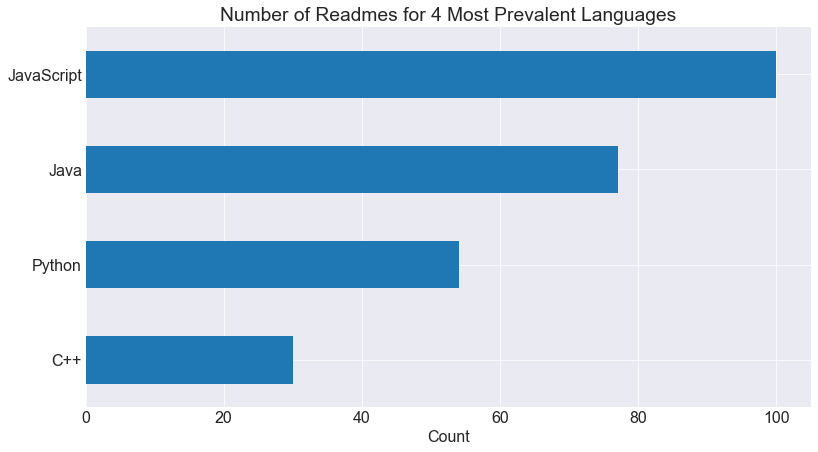

In [149]:
df.language.value_counts().sort_values(ascending = True).plot.barh()
plt.title('Number of Readmes for 4 Most Prevalent Languages')
plt.xlabel("Count");

In [150]:
train.head()

repo    language  \
275  microsoft/Windows-universal-samples  JavaScript   
117  scutan90/DeepLearning-500-questions  JavaScript   
494              actionsdemos/calculator  JavaScript   
218                          apple/swift         C++   
357             macrozheng/mall-learning        Java   

                                       readme_contents  \
275  <!---\n  samplefwlink: http://go.microsoft.com...   
117  \n# 京东售卖链接：https://item.jd.com/12785031.html\n...   
494  Calculator.js: a node.js Demonstration Project...   
218  <img src="https://swift.org/assets/images/swif...   
357  # mall学习教程\n<p>\n    <a href="#公众号"><img src="...   

                                                 clean  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorjs nodejs demonstration project exam...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                               stemmed  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorj nodej demonstr project exampl node...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                            lemmatized  
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...  
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...  
494  calculatorjs nodejs demonstration project exam...  
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...  
357  mall p hrefimg srchttpmacroossosscnshenzhenali...

In [151]:
# rename train to df to simplify code here
df = train.copy()

In [152]:
df.head()

repo    language  \
275  microsoft/Windows-universal-samples  JavaScript   
117  scutan90/DeepLearning-500-questions  JavaScript   
494              actionsdemos/calculator  JavaScript   
218                          apple/swift         C++   
357             macrozheng/mall-learning        Java   

                                       readme_contents  \
275  <!---\n  samplefwlink: http://go.microsoft.com...   
117  \n# 京东售卖链接：https://item.jd.com/12785031.html\n...   
494  Calculator.js: a node.js Demonstration Project...   
218  <img src="https://swift.org/assets/images/swif...   
357  # mall学习教程\n<p>\n    <a href="#公众号"><img src="...   

                                                 clean  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorjs nodejs demonstration project exam...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                               stemmed  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorj nodej demonstr project exampl node...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                            lemmatized  
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...  
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...  
494  calculatorjs nodejs demonstration project exam...  
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...  
357  mall p hrefimg srchttpmacroossosscnshenzhenali...

---
### Word Sets for each Class

In [153]:
df.language.value_counts()

JavaScript    60
Java          46
Python        32
C++           18
Name: language, dtype: int64

In [154]:
# combine all readmes for each class into a single string
js_words = ' '.join(df[df.language == 'JavaScript'].clean)
j_words = ' '.join(df[df.language == 'Java'].clean)
py_words = ' '.join(df[df.language == 'Python'].clean)
c_words = ' '.join(df[df.language == 'C++'].clean)
all_words = ' '.join(df.clean)

In [177]:
# represent as frequencies
js_freq = pd.Series(js_words.split()).value_counts()
js_freq

javascript                                                                                                 784
const                                                                                                      354
function                                                                                                   347
td                                                                                                         309
tr                                                                                                         295
                                                                                                          ... 
statusgithubactionsimage                                                                                     1
decision                                                                                                     1
newsletterbr                                                                                                 1
h

In [178]:
js_freq.head(10)

javascript    784
const         354
function      347
td            309
tr            295
bad           258
tda           256
use           254
good          252
code          239
dtype: int64

In [156]:
j_freq = pd.Series(j_words.split()).value_counts()
j_freq

tdimg                                                                                                                                289
alttd                                                                                                                                276
spring                                                                                                                               177
java                                                                                                                                 145
tr                                                                                                                                   128
                                                                                                                                    ... 
imgsemaphoreci                                                                                                                         1
centralhttpsmavenbadgesherokuappcommavenc

In [157]:
py_freq = pd.Series(py_words.split()).value_counts()
py_freq

learning                          483
python                            382
machine                           368
youtubedl                         306
video                             284
                                 ... 
statepatternsbehavioralstatepy      1
manor                               1
registered                          1
mt                                  1
theanotheanotutorials               1
Length: 10239, dtype: int64

In [158]:
c_freq = pd.Series(c_words.split()).value_counts()
c_freq

build                                                           114
c                                                               101
int                                                              82
new                                                              72
using                                                            67
                                                               ... 
releasedocshowtoguidesgettingstartedmdinstallingdependencies      1
dataloader                                                        1
mix                                                               1
gtjaa                                                             1
guidehttpsdocspxiomasteren                                        1
Length: 4745, dtype: int64

In [159]:
all_freq = pd.Series(all_words.split()).value_counts()
all_freq

javascript                                                           834
use                                                                  600
code                                                                 537
learning                                                             531
tr                                                                   438
                                                                    ... 
srchttpshuggingfacecofrontthumbnailssupportpng                         1
arduplane                                                              1
matrixhttpsdocsnvidiacomdeeplearningcudnnpdfcudnnsupportmatrixpdf      1
spreadsheet                                                            1
springload                                                             1
Length: 24965, dtype: int64

In [160]:
df.language.value_counts()

JavaScript    60
Java          46
Python        32
C++           18
Name: language, dtype: int64

In [161]:
# concat all frequencies together into single df
word_counts = pd.concat([js_freq, j_freq, py_freq, c_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['JavaScript', 'Java', 'Python', 'C++', 'All']
word_counts.head()

JavaScript  Java  Python  C++  All
javascript         784    13      34    3  834
const              354     0       0   52  406
function           347     1       5   17  370
td                 309    13      10    2  334
tr                 295   128       0   15  438

In [162]:
# sort by all
top20 = word_counts.sort_values('All', ascending=False).head(20)

In [163]:
top20

JavaScript  Java  Python  C++  All
javascript          784    13      34    3  834
use                 254    85     217   44  600
code                239    81     174   43  537
learning             24     0     483   24  531
tr                  295   128       0   15  438
data                102    22     283   29  436
python                8    10     382   35  435
using               125    42     177   67  411
const               354     0       0   52  406
machine               4     1     368    9  382
function            347     1       5   17  370
build                88   118      36  114  356
new                 156    33      74   72  335
td                  309    13      10    2  334
library              21    25     256   29  331
file                 81    47     181   20  329
img                 206    42      50   23  321
video                21     3     284    8  316
youtubedl             0     0     306    0  306
aligncenter         171    12      93   17  293

In [164]:
# # visualize this
# top20.drop(columns='All').plot.barh(width=0.75)
# plt.title('Word Counts for Each Class for 20 Most Commonly-Occuring Words')
# plt.xlabel('Count')
# plt.ylabel('Word');

**Takeaways:*
- Language name is near the top in most lists
- There are some other words the mostly show up in one language
    - video - Python
    - img - JS
    - library - Python
    - td - JS
    - function - JS
    - machine - Python
    - const - JS
    - python - Python
    - data - Python
    - tr - JS
    - learning - Python
    - javascript - JS

In [165]:
# def plot_stacked_all(word_counts):
#     '''
#     Takes in word_counts df with an 'All' column and produces stacked bar chart for each category for top num_top words in all classes
#     '''
#     (word_counts.sort_values('All', ascending=False)
#      .head(20)
#      .apply(lambda row: row/row['All'], axis = 1)
#      .drop(columns = 'All')
#      .sort_values(by = 'JavaScript')
#      .plot.barh(stacked = True, width = 1, ec = 'lightgrey')
#     )
#     plt.title('Proportion of Total Count for Each Class for 20 Most-Commonly Occuring Words')
#     plt.legend(bbox_to_anchor= (1.03,1))
#     plt.xlabel('Proportion')
#     plt.ylabel('Word');

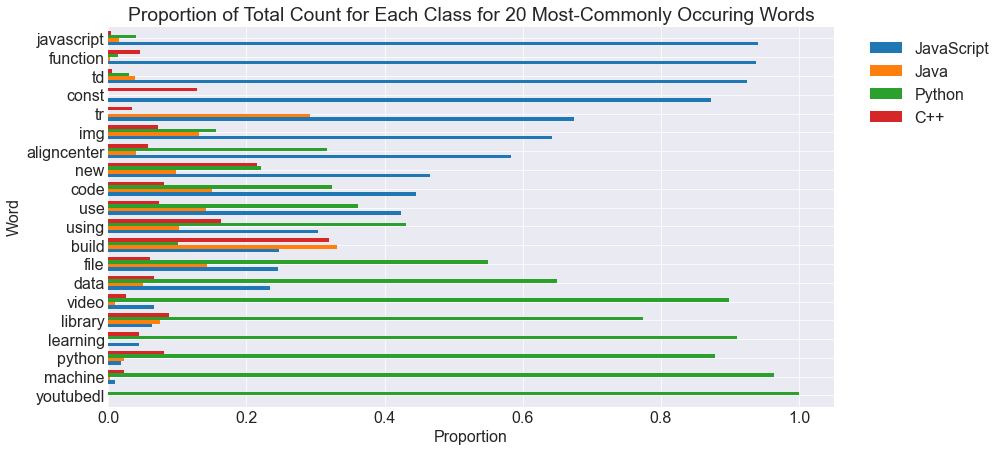

In [166]:
e.plot_bar_all(word_counts)

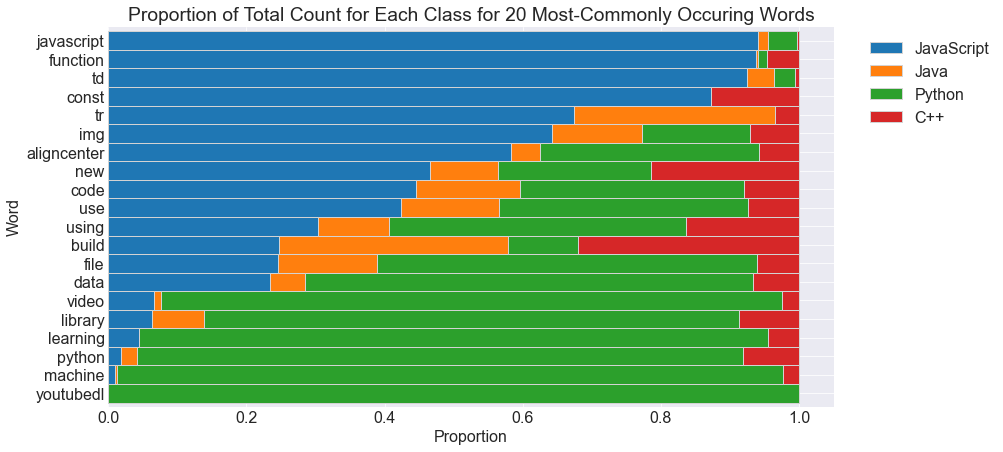

In [167]:
e.plot_stacked_all(word_counts)

In [168]:
# def plot_bar_all(word_counts):
#     '''
#     Takes in word_counts df with an 'All' column and produces bar chart for each category for top num_top words in all classes
#     '''
#     (word_counts.sort_values('All', ascending=False)
#      .head(20)
#      .apply(lambda row: row/row['All'], axis = 1)
#      .drop(columns = 'All')
#      .sort_values(by = 'JavaScript')
#      .plot.barh(width=0.75)
#     )
#     plt.title('Proportion of Total Count for Each Class for 20 Most-Commonly Occuring Words')
#     plt.legend(bbox_to_anchor= (1.03,1))
#     plt.xlabel('Proportion')
#     plt.ylabel('Word');

In [169]:
# (word_counts.sort_values('All', ascending=False)
#  .head(20)
#  .apply(lambda row: row/row['All'], axis = 1)
#  .drop(columns = 'All')
#  .sort_values(by = 'JavaScript')
#  .plot.barh(stacked = True, width = 1, ec = 'lightgrey')
# )
# plt.title('Proportion of Total Count for Each Class for 20 Most-Commonly Occuring Words')
# plt.legend(bbox_to_anchor= (1.03,1))
# plt.xlabel('Proportion')
# plt.ylabel('Word');

Take a look for top 20 occuring words within each class (instead of all)

In [170]:
# def plot_stacked_bar(word_counts, category, num_top = 20, cmap = None):
#     '''
#     Takes in word_counts df with an 'All' column and produces stacked bar chart for each category for top num_top words in the class specified by category argument
#     '''
#     plt.figure(figsize=(16, 9))
#     plt.rc('font', size=16)
#     (word_counts.sort_values(by=category, ascending=False)
#      .head(num_top)
#      .apply(lambda row: row / row['All'], axis=1)
#      .drop(columns='All')
#      .sort_values(by=category)
#      .plot.barh(stacked=True, width=1, ec='lightgrey', cmap = cmap, alpha = 1))
#     plt.legend(bbox_to_anchor= (1.03,1))
#     plt.title(f'Proportions of Most Commonly-Occuring {num_top} {category} Readme Words\n')
#     plt.xlabel('Proportion')
#     plt.ylabel('Word');
#     # make tick labels display as percentages
#     # plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
#     plt.show();

In [171]:
languages = word_counts.columns.to_list()[:-1]
languages

['JavaScript', 'Java', 'Python', 'C++']

In [199]:
js_top_list = (word_counts.sort_values(by='JavaScript', ascending=False)
 .head(20)
 .apply(lambda row: row / row['All'], axis=1)
 .drop(columns='All')
 .sort_values(by="JavaScript", ascending=False)).index.tolist()[:10]

In [201]:
j_top_list = (word_counts.sort_values(by='Java', ascending=False)
 .head(20)
 .apply(lambda row: row / row['All'], axis=1)
 .drop(columns='All')
 .sort_values(by="Java", ascending=False)).index.tolist()[:10]

In [205]:
py_top_list = (word_counts.sort_values(by='Python', ascending=False)
 .head(20)
 .apply(lambda row: row / row['All'], axis=1)
 .drop(columns='All')
 .sort_values(by="Python", ascending=False)).index.tolist()[:10]

In [209]:
c_top_list = (word_counts.sort_values(by='C++', ascending=False)
 .head(20)
 .apply(lambda row: row / row['All'], axis=1)
 .drop(columns='All')
 .sort_values(by="C++", ascending=False)).index.tolist()[:10]

['cpp',
 'tcp',
 'int',
 'apollo',
 'pytorch',
 'c',
 'b',
 'windows',
 'build',
 'class']

In [211]:
explore_list = js_top_list + j_top_list + py_top_list + c_top_list

In [213]:
len(explore_list)

40

<Figure size 1152x648 with 0 Axes>

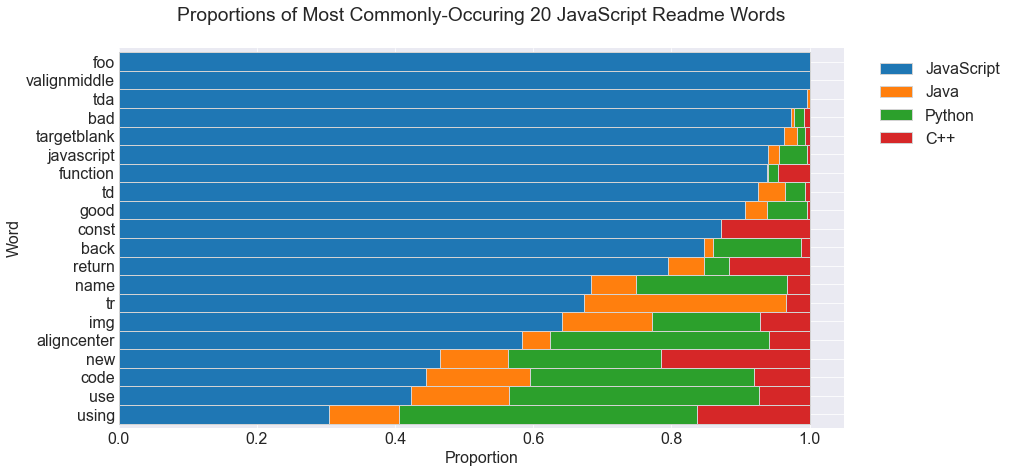

<Figure size 1152x648 with 0 Axes>

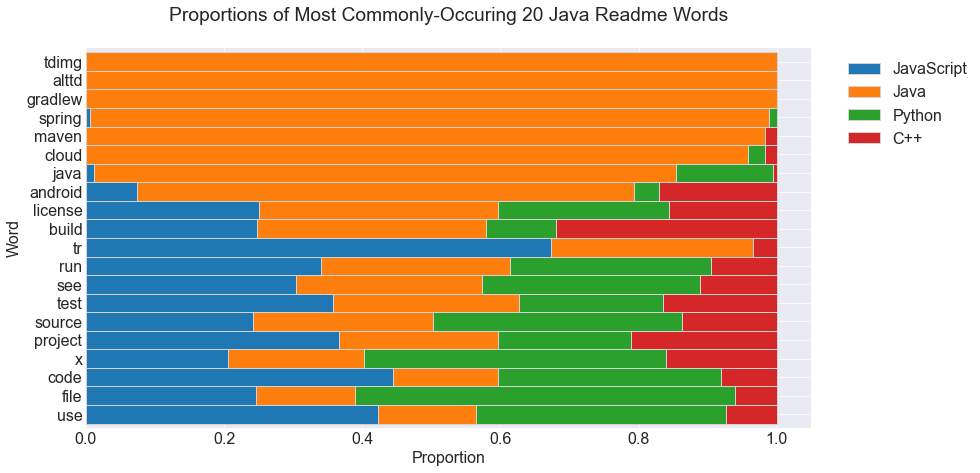

<Figure size 1152x648 with 0 Axes>

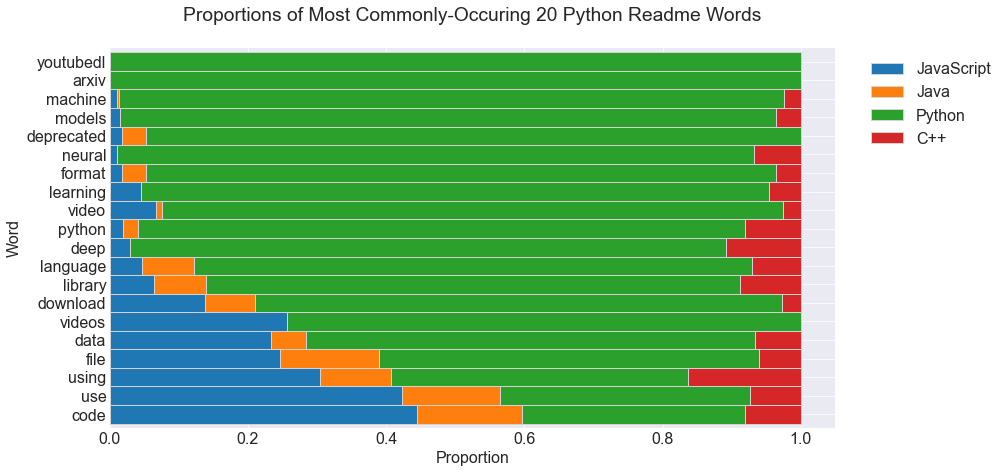

<Figure size 1152x648 with 0 Axes>

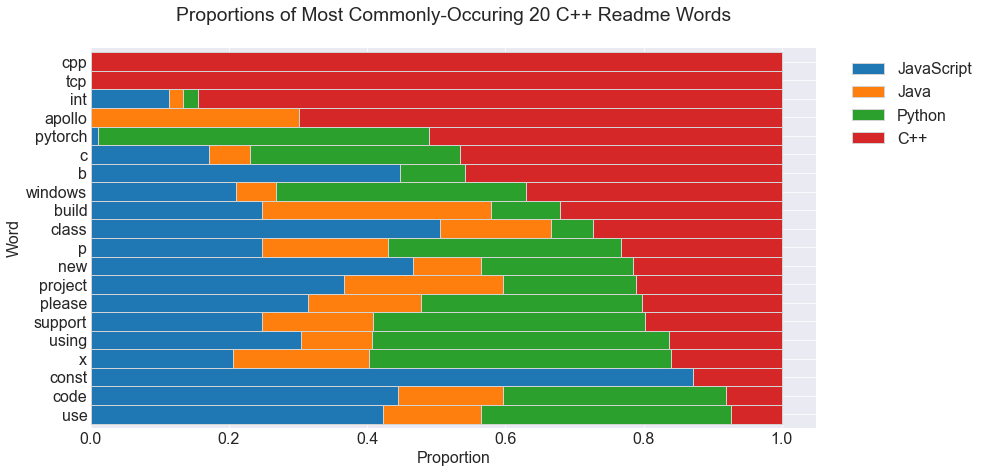

In [172]:
for language in languages:
    e.plot_stacked_bar(word_counts, language);

In [173]:
# def plot_horizontal_bar(word_counts, category, num_top = 20, cmap = None):
#     '''
#     Takes in word_counts df with an 'All' column and produces bar chart for each category for top num_top words in the class specified by category argument
#     '''
#     plt.figure(figsize=(16, 9))
#     plt.rc('font', size=16)
#     (word_counts.sort_values(by=category, ascending=False)
#      .head(num_top)
#      .apply(lambda row: row / row['All'], axis=1)
#      .drop(columns='All')
#      .sort_values(by=category)
#      .plot.barh(width=0.75))
#     plt.title(f'Proportions of Most Commonly-Occuring {num_top} {category} Readme Words\n')
#     plt.xlabel('Proportion')
#     plt.ylabel('Word')
#     # make tick labels display as percentages
#     # plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
#     plt.show();

<Figure size 1152x648 with 0 Axes>

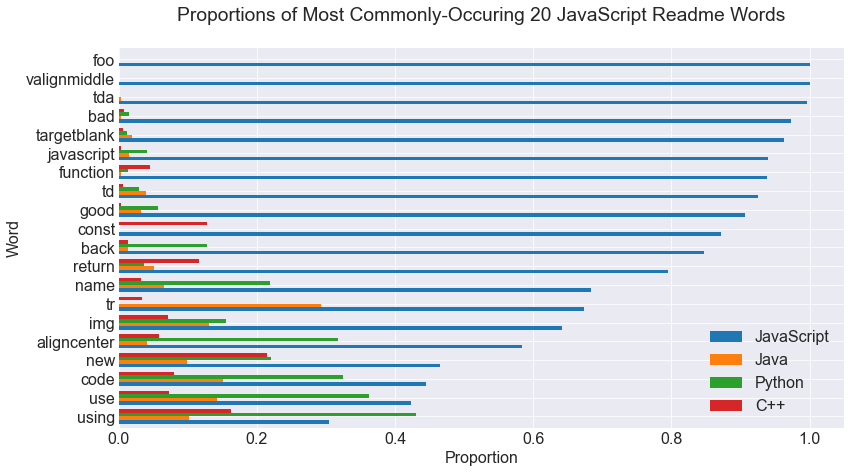

<Figure size 1152x648 with 0 Axes>

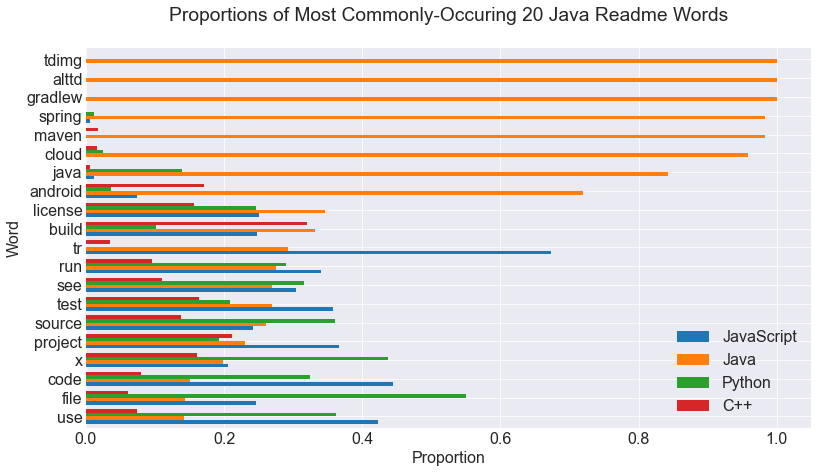

<Figure size 1152x648 with 0 Axes>

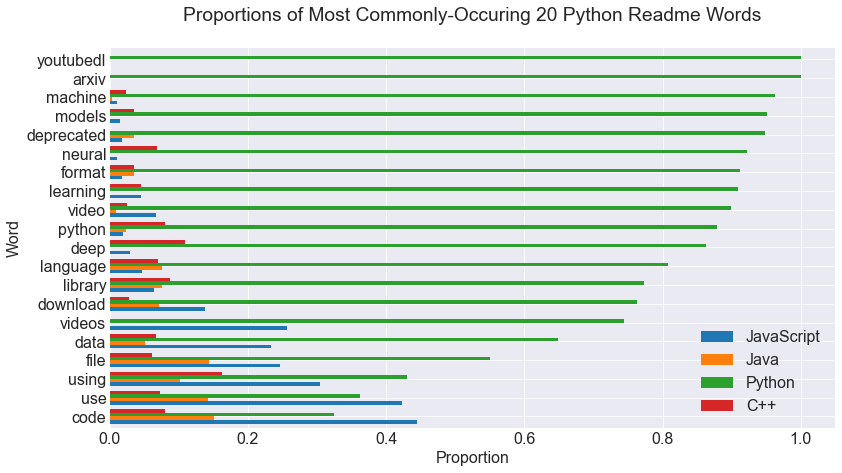

<Figure size 1152x648 with 0 Axes>

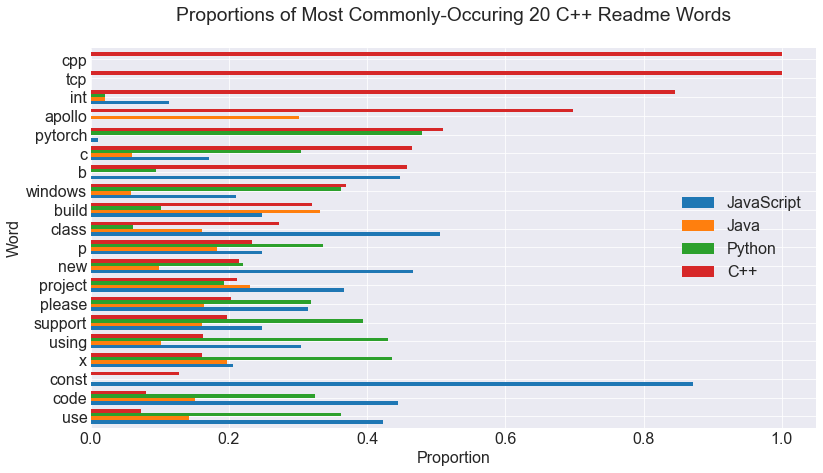

In [174]:
for language in languages:
    e.plot_horizontal_bar(word_counts, language);

### Word Clouds

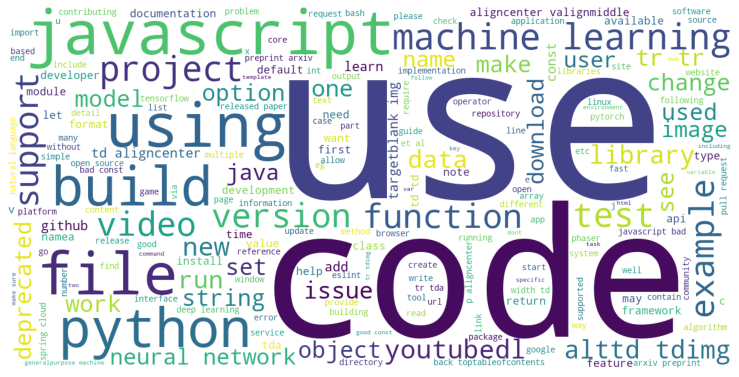

In [175]:
img = WordCloud(background_color='white', width=1200, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.show();

In [176]:
words_list_list = [js_words, j_words, py_words, c_words]

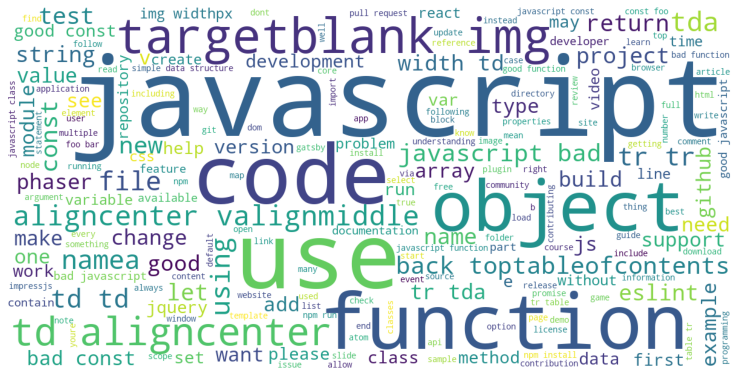

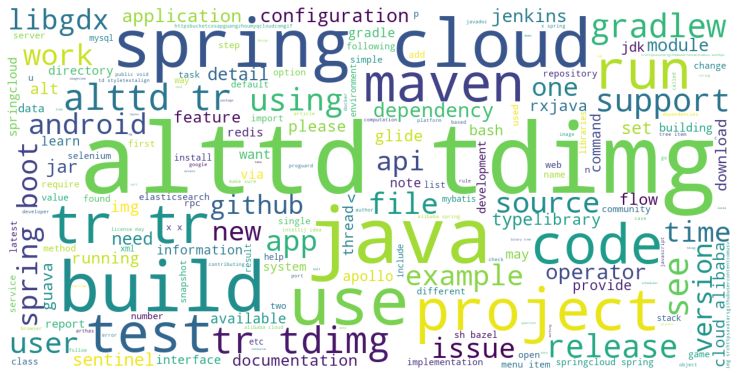

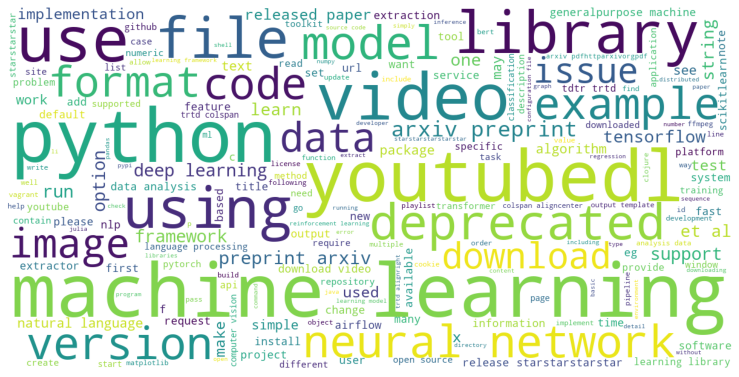

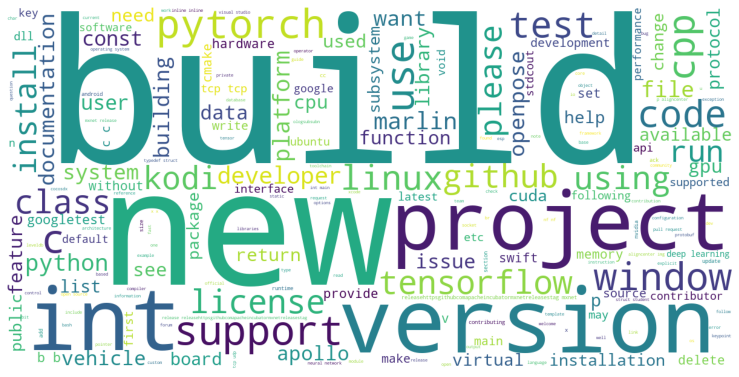

In [105]:
for words_list in words_list_list:
    img = WordCloud(background_color='white', width=1200, height=600).generate(words_list)
    plt.imshow(img)
    plt.axis('off')
    plt.show();

In [106]:
languages

['JavaScript', 'Java', 'Python', 'C++']

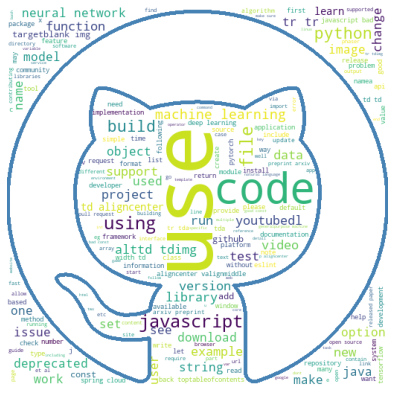

In [107]:
from os import path
from PIL import Image

g_mask = np.array(Image.open("G.png"))
wc = WordCloud(background_color="white", mask=g_mask, contour_width=5, contour_color='steelblue').generate(all_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

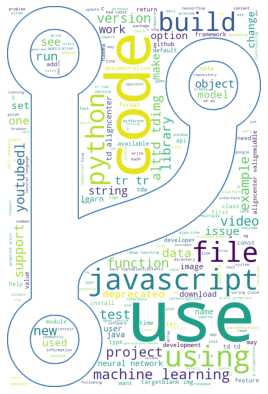

In [108]:
g_mask = np.array(Image.open("G1.png"))
g_mask[g_mask == 0] = 1
g_mask[g_mask == 255] = 0
g_mask[g_mask == 1] = 255
wc = WordCloud(background_color="white", mask=g_mask, contour_width=2, contour_color='steelblue').generate(all_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

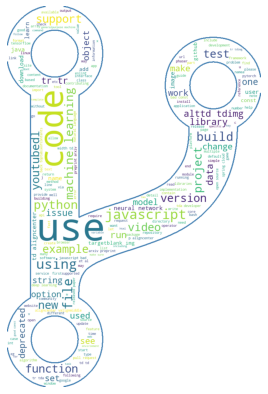

In [109]:
g_mask = np.array(Image.open("G1.png"))
wc = WordCloud(background_color="white", mask=g_mask, contour_width=2, contour_color='steelblue').generate(all_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

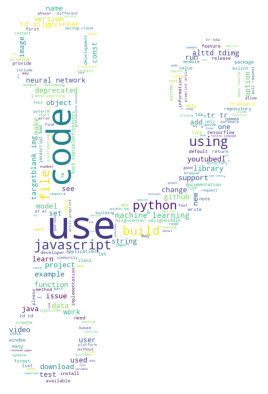

In [110]:
g_mask = np.array(Image.open("G1.png"))
wc = WordCloud(background_color="white", mask=g_mask, contour_width=0, contour_color='steelblue').generate(all_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

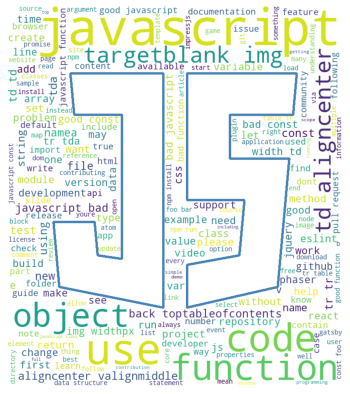

In [111]:
js_mask = np.array(Image.open("JS.png"))
wc = WordCloud(background_color="white", mask=js_mask, contour_width=5, contour_color='steelblue').generate(js_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [112]:
# j_mask = np.array(Image.open("J.png"))
# j_mask[j_mask == 0] = 1
# j_mask[j_mask == 255] = 0
# j_mask[j_mask == 1] = 255

# wc = WordCloud(background_color="white", mask=j_mask, contour_width=5, contour_color='steelblue').generate(j_words)
# plt.imshow(wc)
# plt.axis("off")
# plt.show()

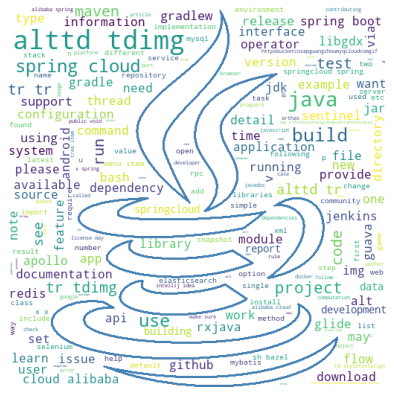

In [113]:
j_mask = np.array(Image.open("J1.png"))
wc = WordCloud(background_color="white", mask=j_mask, contour_width=2, contour_color='steelblue').generate(j_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

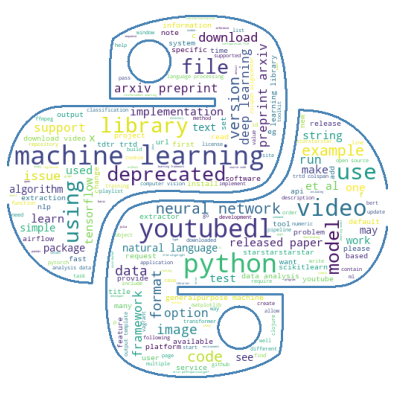

In [114]:
py_mask = np.array(Image.open("Py.png"))
wc = WordCloud(background_color="white", mask=py_mask, contour_width=2, contour_color='steelblue').generate(py_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

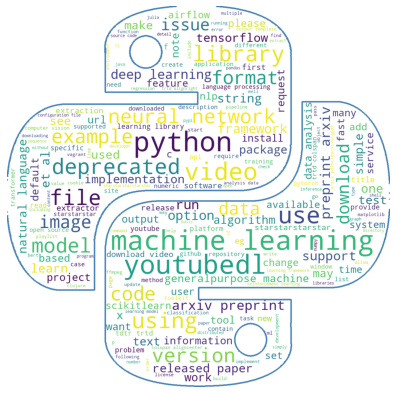

In [115]:
py_mask = np.array(Image.open("Py1.png"))
py_mask[py_mask == 0] = 1
py_mask[py_mask == 255] = 0
py_mask[py_mask == 1] = 255
wc = WordCloud(background_color="white", mask=py_mask, contour_width=5, contour_color='steelblue').generate(py_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

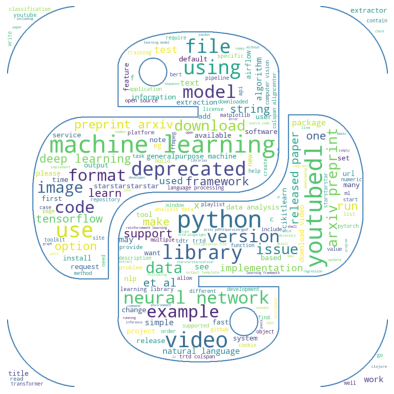

In [116]:
py_mask = np.array(Image.open("Py2.png"))
wc = WordCloud(background_color="white", mask=py_mask, contour_width=2, contour_color='steelblue').generate(py_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

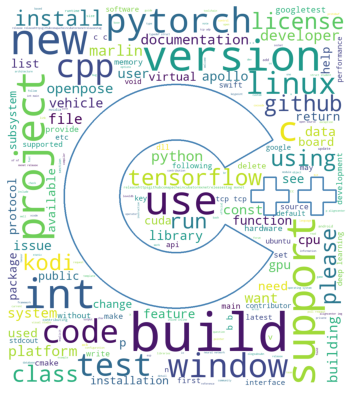

In [117]:
c_mask = np.array(Image.open("C.png"))
wc = WordCloud(background_color="white", mask=c_mask, contour_width=5, contour_color='steelblue').generate(c_words)
plt.imshow(wc)
plt.axis("off")
plt.show()

### Bigrams

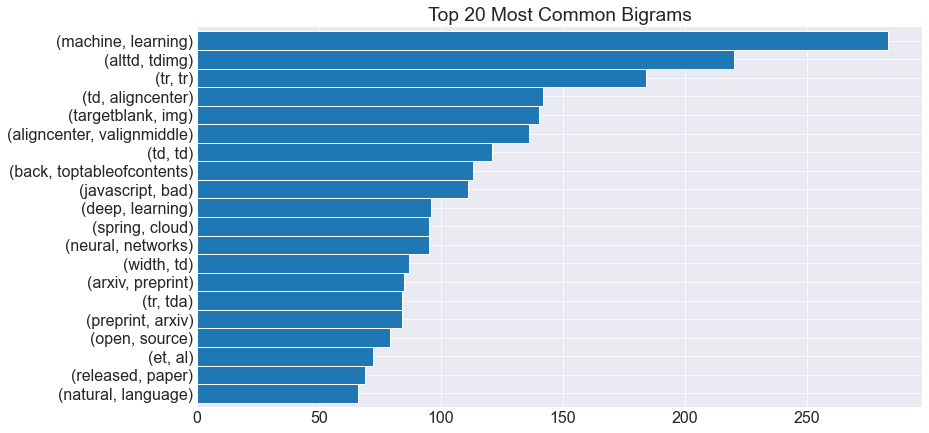

In [118]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common Bigrams');

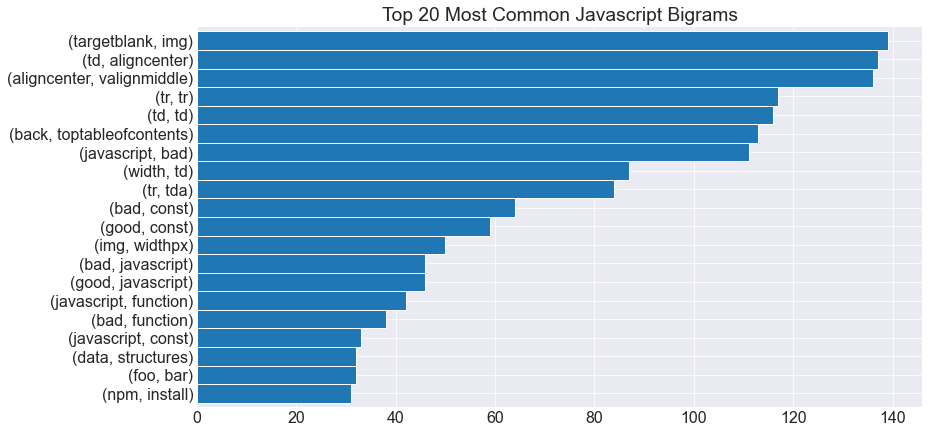

In [119]:
pd.Series(nltk.bigrams(js_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common Javascript Bigrams');

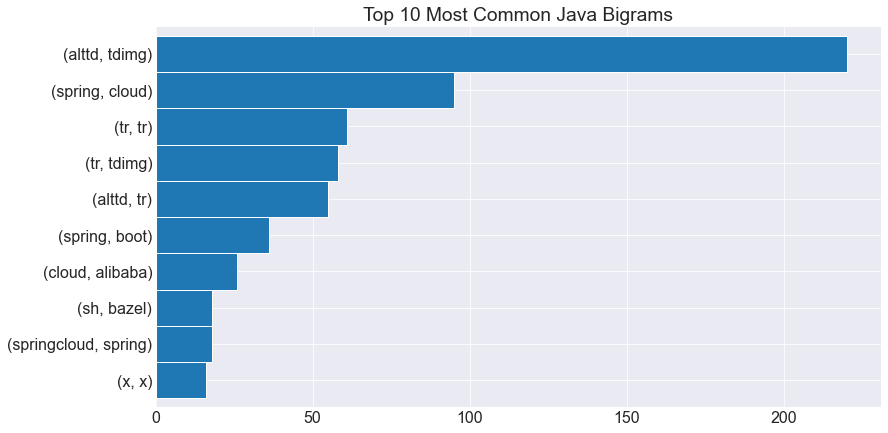

In [120]:
pd.Series(nltk.bigrams(j_words.split())).value_counts().head(10).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 10 Most Common Java Bigrams');

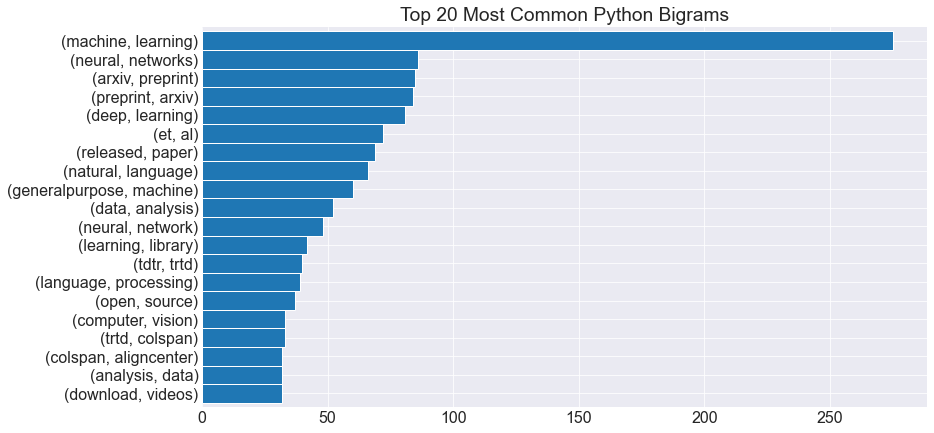

In [121]:
pd.Series(nltk.bigrams(py_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common Python Bigrams');

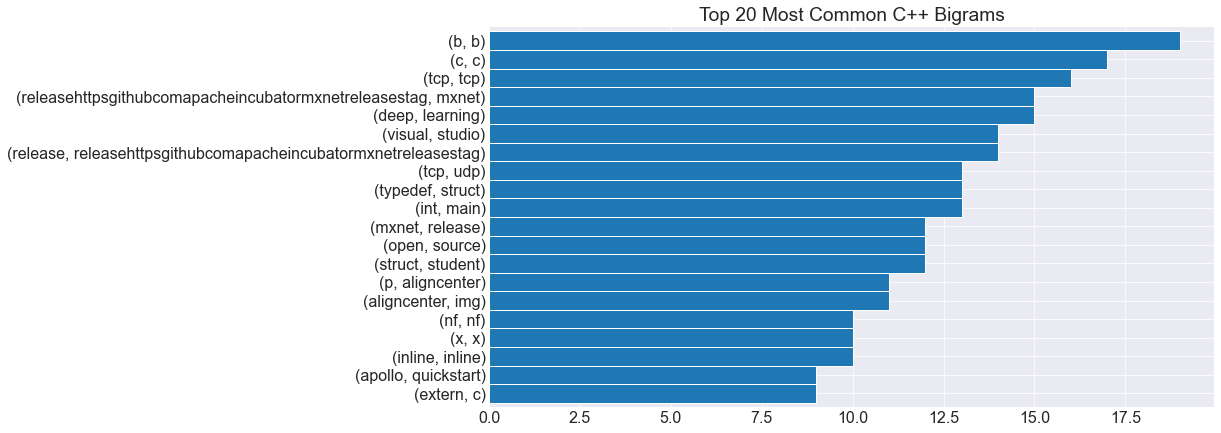

In [122]:
pd.Series(nltk.bigrams(c_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common C++ Bigrams');

### Trigrams

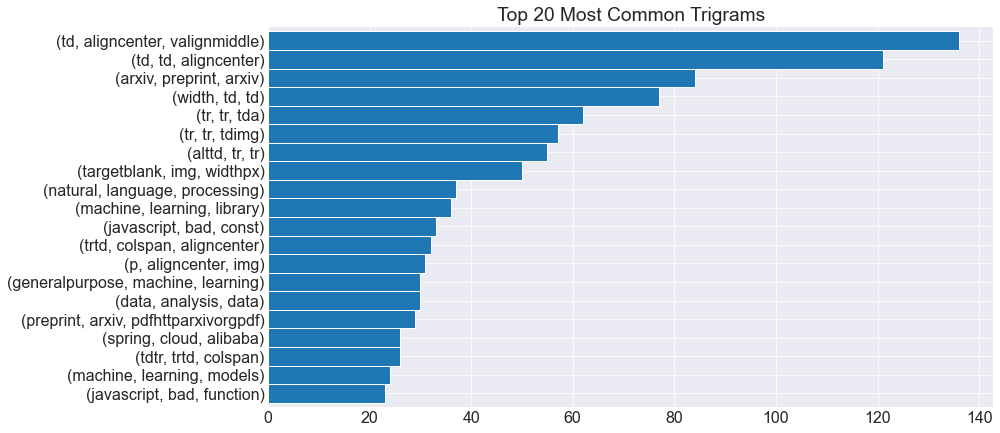

In [123]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common Trigrams');

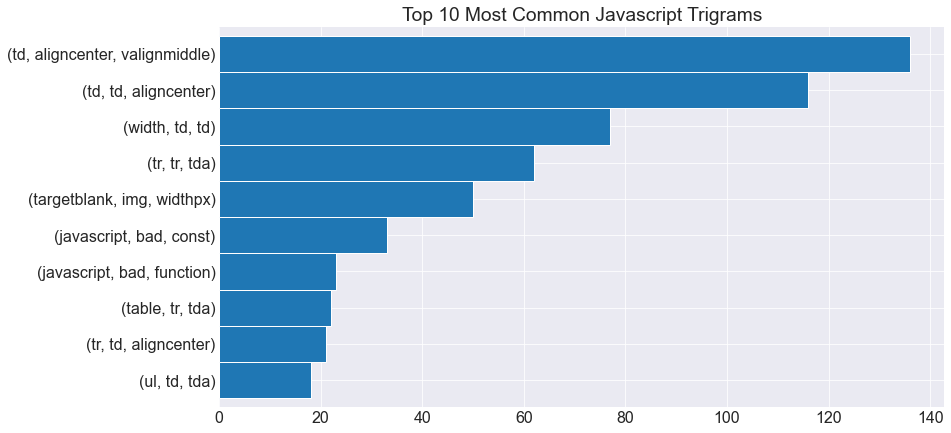

In [124]:
pd.Series(nltk.trigrams(js_words.split())).value_counts().head(10).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 10 Most Common Javascript Trigrams');

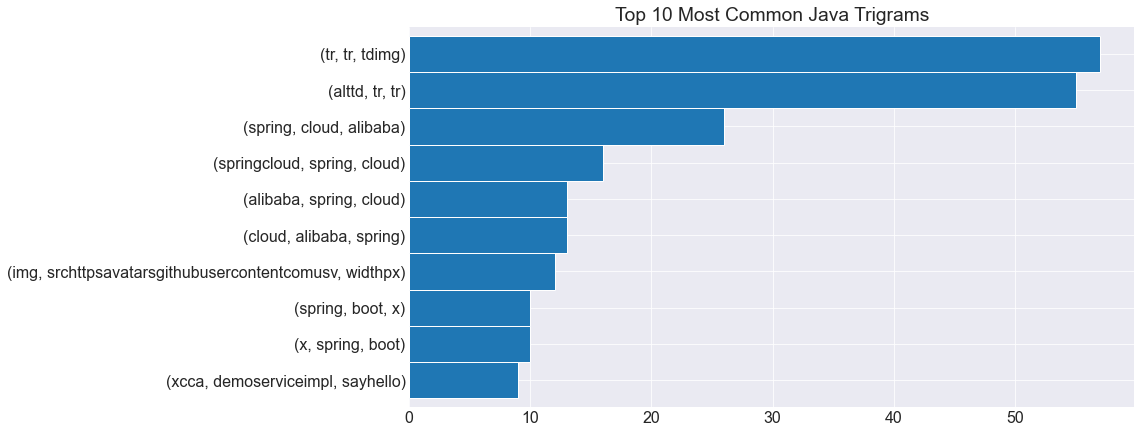

In [125]:
pd.Series(nltk.trigrams(j_words.split())).value_counts().head(10).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 10 Most Common Java Trigrams');

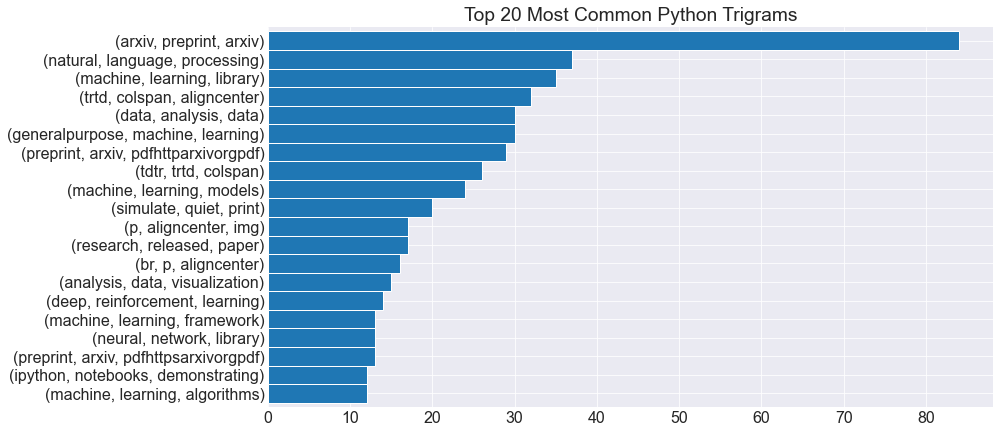

In [126]:
pd.Series(nltk.trigrams(py_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common Python Trigrams');

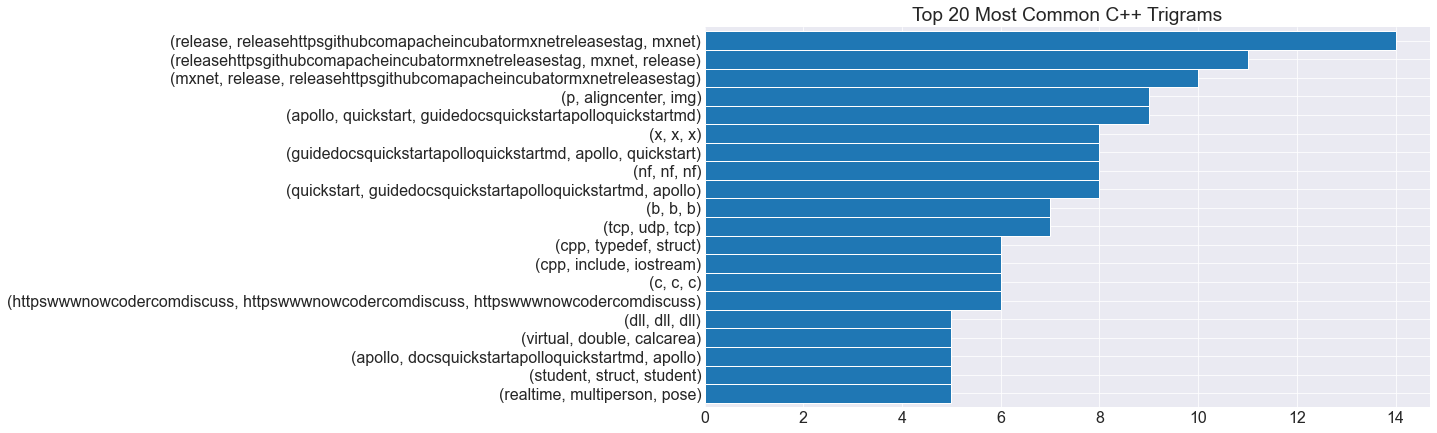

In [127]:
pd.Series(nltk.trigrams(c_words.split())).value_counts().head(20).sort_values(ascending=True).plot.barh(width=1, ec='white')
plt.title('Top 20 Most Common C++ Trigrams');

### Character/Word Count

In [128]:
df['repo_length'] = df.clean.apply(len)

In [129]:
df['word_count'] = df.clean.apply(str.split).apply(len)

In [130]:
df['ave_word_length'] = df.repo_length / df.word_count

In [131]:
df.head()

repo    language  \
275  microsoft/Windows-universal-samples  JavaScript   
117  scutan90/DeepLearning-500-questions  JavaScript   
494              actionsdemos/calculator  JavaScript   
218                          apple/swift         C++   
357             macrozheng/mall-learning        Java   

                                       readme_contents  \
275  <!---\n  samplefwlink: http://go.microsoft.com...   
117  \n# 京东售卖链接：https://item.jd.com/12785031.html\n...   
494  Calculator.js: a node.js Demonstration Project...   
218  <img src="https://swift.org/assets/images/swif...   
357  # mall学习教程\n<p>\n    <a href="#公众号"><img src="...   

                                                 clean  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorjs nodejs demonstration project exam...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                               stemmed  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...   
494  calculatorj nodej demonstr project exampl node...   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...   

                                            lemmatized  repo_length  \
275  samplefwlink httpgomicrosoftcomfwlinkplinkid u...        16048   
117  httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...          466   
494  calculatorjs nodejs demonstration project exam...          462   
218  img srchttpsswiftorgassetsimagesswiftsvg altsw...         7528   
357  mall p hrefimg srchttpmacroossosscnshenzhenali...         8390   

     word_count  ave_word_length  
275        1344        11.940476  
117          70         6.657143  
494          58         7.965517  
218         503        14.966203  
357         235        35.702128

---

In [132]:
df.repo_length.mean()

8283.211538461539

In [133]:
df[df.language == 'JavaScript'].repo_length.mean()

7375.75

In [134]:
df[df.language == 'Java'].repo_length.mean()

5222.891304347826

In [135]:
df[df.language == 'Python'].repo_length.mean()

14425.6875

In [136]:
df[df.language == 'C++'].repo_length.mean()

8208.944444444445

---

In [137]:
df.word_count.mean()

699.4871794871794

In [138]:
df[df.language == 'JavaScript'].word_count.mean()

638.0666666666667

In [139]:
df[df.language == 'Java'].word_count.mean()

354.17391304347825

In [140]:
df[df.language == 'Python'].word_count.mean()

1306.84375

In [141]:
df[df.language == 'C++'].word_count.mean()

706.9444444444445

---

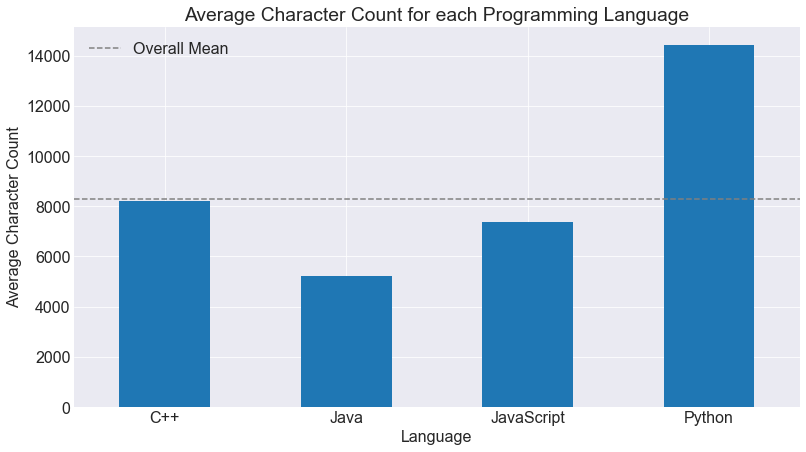

In [142]:
df.groupby('language').repo_length.mean().plot.bar(label='')
plt.title('Average Character Count for each Programming Language')
plt.xlabel('Language')
plt.ylabel('Average Character Count')
plt.axhline(y=df.repo_length.mean(), color='gray', ls='--', label = 'Overall Mean')
plt.xticks(rotation=0)
plt.legend();

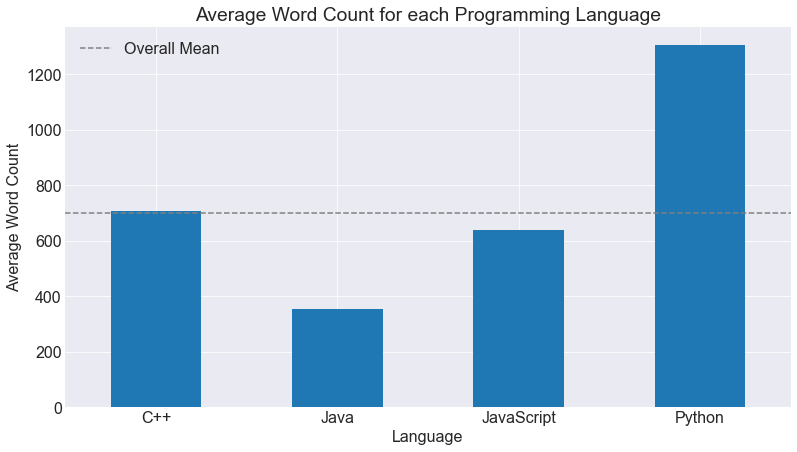

In [143]:
df.groupby('language').word_count.mean().plot.bar(label='')
plt.title('Average Word Count for each Programming Language')
plt.xlabel('Language')
plt.ylabel('Average Word Count')
plt.axhline(y=df.word_count.mean(), color='gray', ls='--', label = 'Overall Mean')
plt.xticks(rotation=0)
plt.legend();

In [144]:
df.groupby('language').ave_word_length.mean().plot.bar(label='')
plt.title('Average Word Length for each Programming Language')
plt.xlabel('Language')
plt.ylabel('Average Word Length')
plt.axhline(y=df.ave_word_length.mean(), color='gray', ls='--', label = 'Overall Mean')
plt.xticks(rotation=0)
plt.legend();

In [149]:
df.repo_length.sort_values().head(10)

454      0
106     20
111     20
77      29
300     31
64      37
202     57
315    114
287    154
342    164
Name: repo_length, dtype: int64

In [152]:
df[df.repo_length < 200]

repo    language  \
287             RedHatTraining/DO288-apps  JavaScript   
202                    bettiolo/node-echo  JavaScript   
342               udacity/ud851-Exercises        Java   
106                        vercel/next.js  JavaScript   
64              RedHatTraining/DO180-apps  JavaScript   
454  aosp-mirror/platform_frameworks_base        Java   
300                       hasura/imad-app  JavaScript   
315                         apache/hadoop        Java   
111                        vercel/next.js  JavaScript   
77                shadowsocks/shadowsocks      Python   

                                       readme_contents  \
287  # DO288 Containerized Example Applications\n\n...   
202  node-echo\n=========\n\nnode.js echo server, r...   
342  # Toy App Exercise Repo\n\nThis is a exercise ...   
106                            packages/next/README.md   
64   # DO180-apps\nDO180 Repository for Sample Appl...   
454                                                      
300           # imad-app\n\nIMAD course application.\n   
315  For the latest information about Hadoop, pleas...   
111                            packages/next/README.md   
77                 Removed according to regulations.\n   

                                                 clean  \
287  containerized example applications repository ...   
202  nodeecho nodejs echo server returns request da...   
342  toy app exercise repo exercise repository deve...   
106                               packagesnextreadmemd   
64               doapps repository sample applications   
454                                                      
300                    imadapp imad course application   
315  latest information hadoop please visit website...   
111                               packagesnextreadmemd   
77                       removed according regulations   

                                               stemmed  \
287  container exampl applic repositori contain col...   
202  nodeecho nodej echo server return request data...   
342  toy app exercis repo exercis repositori develo...   
106                               packagesnextreadmemd   
64                       doapp repositori sampl applic   
454                                                      
300                          imadapp imad cours applic   
315  latest inform hadoop pleas visit websit httpha...   
111                               packagesnextreadmemd   
77                                  remov accord regul   

                                            lemmatized  repo_length  \
287  containerized example application repository c...          154   
202  nodeecho nodejs echo server return request dat...           57   
342  toy app exercise repo exercise repository deve...          164   
106                               packagesnextreadmemd           20   
64                doapps repository sample application           37   
454                                                               0   
300                    imadapp imad course application           31   
315  latest information hadoop please visit website...          114   
111                               packagesnextreadmemd           20   
77                        removed according regulation           29   

     word_count  ave_word_length  
287          17         9.058824  
202           8         7.125000  
342          13        12.615385  
106           1        20.000000  
64            4         9.250000  
454           0              NaN  
300           4         7.750000  
315           9        12.666667  
111           1        20.000000  
77            3         9.666667

## Modeling

In [3]:
# aquire, prep and split data
df = pd.read_json('data.json')
df = p.prep_nlp(df, original_text_col='readme_contents', extra_words=['&#9;'])

In [4]:
# df.head()

In [5]:
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [8]:
# train.head()

### Baseline

In [304]:
# predict JavaScript for each readme
baseline_accuracy = train.language.value_counts(normalize=True)[0]
baseline_accuracy

0.38461538461538464

In [7]:
# PHP is the baseline prediction
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')

Baseline Accuracy: 38%


### Encoding Data

In [8]:
# this is the column that I will use for the first iteration
df.clean

3      div aligncenter img srchttpswwwtensorfloworgim...
5      p aligncenter hrefhttpsgetbootstrapcom img src...
8      nightscout web monitor aka cgmremotemonitor ni...
11     opencv open source computer vision library res...
13     div aligncenter hrefhttpswwwcycxyz img srchttp...
                             ...                        
494    calculatorjs nodejs demonstration project exam...
495    easyexcel build statushttpsgithubcomalibabaeas...
496    administrativedivisionsofchina code stylehttps...
497    simplenodejsreactnpmapp repository build nodej...
499    brackets task implement function checkstr brac...
Name: clean, Length: 261, dtype: object

#### CV 

In [9]:
# need to encode data by having a count of each word in each readme
# will need to do this for the whole dataset
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words_cv = cv.fit_transform(df.clean)

In [10]:
bag_of_words_cv

<261x37586 sparse matrix of type '<class 'numpy.int64'>'
	with 87362 stored elements in Compressed Sparse Row format>

In [11]:
bag_of_words_cv.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
len(cv.get_feature_names())

37586

In [13]:
bow = pd.DataFrame(bag_of_words_cv.todense(), columns=cv.get_feature_names())

In [14]:
bow.head()

aa  aaai  aaaiconfigsghm  aaaiconfigsscnetreadmemd  aac  aakash  aan  \
0   0     0               0                         0    0       0    0   
1   0     0               0                         0    0       0    0   
2   0     0               0                         0    0       0    0   
3   0     0               0                         0    0       0    0   
4   0     0               0                         0    0       0    0   

   aanzeejavascripthttpsgithubcomaanzeejavascript  aarch  aaron  ...  \
0                                               0      0      0  ...   
1                                               0      0      0  ...   
2                                               0      0      0  ...   
3                                               0      0      0  ...   
4                                               0      0      0  ...   

   zxingcpphttpsgithubcomglassechidnazxingcpp  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   zxingcpprbhttpsgithubcomglassechidnazxingcpprb  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   zxingjslibraryhttpsgithubcomzxingjslibrary  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   zxingobjchttpsgithubcomthelevelupzxingobjc  zxingorg  zynga  zypper  \
0                                           0         0      0       0   
1                                           0         0      0       0   
2                                           0         0      0       0   
3                                           0         0      0       0   
4                                           0         0      0       0   

   zyszysgmailcom  zyszyshttpsgithubcomzyszys  zyte  
0               0                           0     0  
1               0                           0     0  
2               0                           0     0  
3               0                           0     0  
4               0                           0     0  

[5 rows x 37586 columns]

#### TFID

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bag_of_words_tfid = tfidf.fit_transform(df.clean)

pd.DataFrame(bag_of_words_tfid.todense(), columns=tfidf.get_feature_names()).head()

aa  aaai  aaaiconfigsghm  aaaiconfigsscnetreadmemd  aac  aakash  aan  \
0  0.0   0.0             0.0                       0.0  0.0     0.0  0.0   
1  0.0   0.0             0.0                       0.0  0.0     0.0  0.0   
2  0.0   0.0             0.0                       0.0  0.0     0.0  0.0   
3  0.0   0.0             0.0                       0.0  0.0     0.0  0.0   
4  0.0   0.0             0.0                       0.0  0.0     0.0  0.0   

   aanzeejavascripthttpsgithubcomaanzeejavascript  aarch  aaron  ...  \
0                                             0.0    0.0    0.0  ...   
1                                             0.0    0.0    0.0  ...   
2                                             0.0    0.0    0.0  ...   
3                                             0.0    0.0    0.0  ...   
4                                             0.0    0.0    0.0  ...   

   zxingcpphttpsgithubcomglassechidnazxingcpp  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   zxingcpprbhttpsgithubcomglassechidnazxingcpprb  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   zxingjslibraryhttpsgithubcomzxingjslibrary  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   zxingobjchttpsgithubcomthelevelupzxingobjc  zxingorg  zynga  zypper  \
0                                         0.0       0.0    0.0     0.0   
1                                         0.0       0.0    0.0     0.0   
2                                         0.0       0.0    0.0     0.0   
3                                         0.0       0.0    0.0     0.0   
4                                         0.0       0.0    0.0     0.0   

   zyszysgmailcom  zyszyshttpsgithubcomzyszys  zyte  
0             0.0                         0.0   0.0  
1             0.0                         0.0   0.0  
2             0.0                         0.0   0.0  
3             0.0                         0.0   0.0  
4             0.0                         0.0   0.0  

[5 rows x 37586 columns]

#### Bag of Ngrams

##### Bigrams

In [16]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_words_bi = cv.fit_transform(df.clean)

pd.DataFrame(bag_of_words_bi.todense(), columns=cv.get_feature_names())

aa ok  aaai spring  aaaiconfigsghm mask  \
0        0            0                    0   
1        0            0                    0   
2        0            0                    0   
3        0            0                    0   
4        0            0                    0   
..     ...          ...                  ...   
256      0            0                    0   
257      0            0                    0   
258      0            0                    0   
259      0            0                    0   
260      0            0                    0   

     aaaiconfigsscnetreadmemd autoassign  aac flac  aac flv  \
0                                      0         0        0   
1                                      0         0        0   
2                                      0         0        0   
3                                      0         0        0   
4                                      0         0        0   
..                                   ...       ...      ...   
256                                    0         0        0   
257                                    0         0        0   
258                                    0         0        0   
259                                    0         0        0   
260                                    0         0        0   

     aakash srivastavhttpsdevtoaakashsrmasteringthejavascriptthiskeywordpfa  \
0                                                    0                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
256                                                  0                        
257                                                  0                        
258                                                  0                        
259                                                  0                        
260                                                  0                        

     aan zee  aanzeejavascripthttpsgithubcomaanzeejavascript airbnb  \
0          0                                                  0       
1          0                                                  0       
2          0                                                  0       
3          0                                                  0       
4          0                                                  0       
..       ...                                                ...       
256        0                                                  0       
257        0                                                  0       
258        0                                                  0       
259        0                                                  0       
260        0                                                  0       

     aarch build  ...  zxingjslibraryhttpsgithubcomzxingjslibrary typescript  \
0              0  ...                                                  0       
1              0  ...                                                  0       
2              0  ...                                                  0       
3              0  ...                                                  0       
4              0  ...                                                  0       
..           ...  ...                                                ...       
256            0  ...                                                  0       
257            0  ...                                                  0       
258            0  ...                                                  0       
259            0  ...                                                

##### Trigrams

In [17]:
cv = CountVectorizer(ngram_range=(3, 3))
bag_of_words_tri = cv.fit_transform(df.clean)

pd.DataFrame(bag_of_words_tri.todense(), columns=cv.get_feature_names())

aa ok aoperator  aaai spring symposium  aaaiconfigsghm mask scoring  \
0                  0                      0                            0   
1                  0                      0                            0   
2                  0                      0                            0   
3                  0                      0                            0   
4                  0                      0                            0   
..               ...                    ...                          ...   
256                0                      0                            0   
257                0                      0                            0   
258                0                      0                            0   
259                0                      0                            0   
260                0                      0                            0   

     aaaiconfigsscnetreadmemd autoassign arxivconfigsautoassignreadmemd  \
0                                                    0                    
1                                                    0                    
2                                                    0                    
3                                                    0                    
4                                                    0                    
..                                                 ...                    
256                                                  0                    
257                                                  0                    
258                                                  0                    
259                                                  0                    
260                                                  0                    

     aac flac mp  aac flv mp  \
0              0           0   
1              0           0   
2              0           0   
3              0           0   
4              0           0   
..           ...         ...   
256            0           0   
257            0           0   
258            0           0   
259            0           0   
260            0           0   

     aakash srivastavhttpsdevtoaakashsrmasteringthejavascriptthiskeywordpfa binding  \
0                                                    0                                
1                                                    0                                
2                                                    0                                
3                                                    0                                
4                                                    0                                
..                                                 ...                                
256                                                  0                                
257                                                  0                                
258                                                  0                                
259                                                  0                                
260                                                  0                                

     aan zee aanzeejavascripthttpsgithubcomaanzeejavascript  \
0                                                    0        
1                                                    0        
2                                                    0        
3                                                    0        
4                                                    0        
..                                                 ...        
256                                                  0        
257                                                  0        
258                                                  0        
259                                                  0        
260                                                  0        

    

### X and y

In [14]:
# # aquire, prep and split data
# df = pd.read_json('data.json')
# df = p.prep_nlp(df, original_text_col='readme_contents', extra_words=['&#9;'])

In [15]:
# df.head()

In [16]:
# train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [17]:
# train.head()

In [18]:
# # create X for each split with raw data
# X_train = train.clean
# X_validate = validate.clean
# X_test = test.clean

In [19]:
# # create y for each split with raw data
# y_train = train.language
# y_validate = validate.language
# y_test = test.language

In [20]:
# # make a function
# def X_and_y(train, validate, test, data_col, target):
#     '''
#     Takes in splits, column name for cleaned text, and column name for target and returns X and y for each split
#     '''
#     X_train = train[data_col]
#     X_validate = validate[data_col]
#     X_test = test[data_col]
#     y_train = train[target]
#     y_validate = validate[target]
#     y_test = test[target]
#     return X_train, X_validate, X_test, y_train, y_validate, y_test

In [21]:
# X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'clean', 'language')

In [22]:
# # now create BOW for each type of encoding - CV
# cv = CountVectorizer()
# X_bow_cv_train = cv.fit_transform(X_train)
# X_bow_cv_validate = cv.transform(X_validate)
# # X_bow_cv_test = cv.transform(X_test)

In [23]:
# # now create BOW for each type of encoding - TFID
# tfidf = TfidfVectorizer()
# X_bow_tfidf_train = tfidf.fit_transform(X_train)
# X_bow_tfidf_validate = tfidf.transform(X_validate)
# # X_bow_tfid_test = tfidf.transform(X_test)

In [24]:
# # now create BOW for each type of encoding - Bigram
# cv2 = CountVectorizer(ngram_range=(2, 2))
# X_bow_bi_train = cv2.fit_transform(X_train)
# X_bow_bi_validate = cv2.transform(X_validate)
# # X_bow_bi_test = cv2.transform(X_test)

In [25]:
# # now create BOW for each type of encoding - Bigram
# cv3 = CountVectorizer(ngram_range=(3, 3))
# X_bow_tri_train = cv2.fit_transform(X_train)
# X_bow_tri_validate = cv2.transform(X_validate)
# # X_bow_tri_test = cv2.transform(X_test)

In [28]:
# # create a function
# def vectorize(vectorizer, X_train, X_validate, X_test, grams = (1,1)):
#     '''
#     Takes in vectorizer, X for each split, and n_grams argument for vectorizer and returns vectorized version of each split
#     '''
#     v = vectorizer(ngram_range=grams)
#     X_bow_train = v.fit_transform(X_train)
#     X_bow_validate = v.transform(X_validate)
#     X_bow_test= v.transform(X_test)
#     return X_bow_train, X_bow_validate, X_bow_test

In [29]:
# X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = m.vectorize(CountVectorizer, X_train, X_validate, X_test)

# X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = m.vectorize(TfidfVectorizer, X_train, X_validate, X_test)

# X_bow_bi_train, X_bow_bi_validate, X_bow_bi_test = m.vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(2, 2))

# X_bow_tri_train, X_bow_tri_validate, X_bow_tri_test = m.vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(3, 3))

In [29]:
# # create a function
# def vectorize(v, X_train, X_validate, X_test, grams = (1,1)):
#     if v == 'count':
#         v = CountVectorizer(ngram_range=grams)
#     elif v == 'tfidf': 
#         v = TfidfVectorizer(ngram_range=grams)
#     X_bow_train = v.fit_transform(X_train)
#     X_bow_validate = v.transform(X_validate)
#     X_bow_test= v.transform(X_test)
#     return X_bow_train, X_bow_validate, X_bow_test

In [108]:
# X_bow_bi_train, X_bow_bi_validate, X_bow_bi_test = vectorize('count', X_train, X_validate, X_test, grams=(2, 2))

# X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize('count', X_train, X_validate, X_test)

# X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize('tfidf', X_train, X_validate, X_test)

# X_bow_bi_train, X_bow_bi_validate, X_bow_bi_test = vectorize('count', X_train, X_validate, X_test, grams=(2, 2))

# X_bow_tri_train, X_bow_tri_validate, X_bow_tri_test = vectorize('count', X_train, X_validate, X_test, grams=(3, 3))

### Decision Tree

---
#### CV

In [33]:
# tree = DecisionTreeClassifier(max_depth=5, random_state=123)
# tree.fit(X_bow_cv_train, y_train)
# (tree.score(X_bow_cv_train, y_train)) , (tree.score(X_bow_cv_validate, y_validate))

(0.8782051282051282, 0.6153846153846154)

---
#### TFID

In [36]:
# tree.fit(X_bow_tfidf_train, y_train)
# (tree.score(X_bow_tfidf_train, y_train)) , (tree.score(X_bow_tfidf_validate, y_validate))

(0.9230769230769231, 0.6730769230769231)

---
#### Bigrams

In [37]:
# tree.fit(X_bow_bi_train, y_train)
# (tree.score(X_bow_bi_train, y_train)) , (tree.score(X_bow_bi_validate, y_validate))

(0.6282051282051282, 0.40384615384615385)

---
#### Trigrams

In [38]:
# tree.fit(X_bow_tri_train, y_train)
# (tree.score(X_bow_tri_train, y_train)) , (tree.score(X_bow_tri_validate, y_validate))

(0.5, 0.4807692307692308)

---
### Random Forest
---

#### CV

In [39]:
# forest = RandomForestClassifier(max_depth=5, random_state=123)
# forest.fit(X_bow_cv_train, y_train)
# (forest.score(X_bow_cv_train, y_train)) , (forest.score(X_bow_cv_validate, y_validate))

(0.8461538461538461, 0.5961538461538461)

---
#### TFID

In [41]:
# forest.fit(X_bow_tfidf_train, y_train)
# (forest.score(X_bow_tfidf_train, y_train)) , (forest.score(X_bow_tfidf_validate, y_validate))

(0.8525641025641025, 0.5384615384615384)

---
#### Bigrams

In [42]:
# forest.fit(X_bow_bi_train, y_train)
# (forest.score(X_bow_bi_train, y_train)) , (forest.score(X_bow_bi_validate, y_validate))

(0.5, 0.40384615384615385)

---
#### Trigrams

In [43]:
# forest.fit(X_bow_tri_train, y_train)
# (forest.score(X_bow_tri_train, y_train)) , (forest.score(X_bow_tri_validate, y_validate))

(0.46153846153846156, 0.40384615384615385)

---
### Logistic Regression
---

#### CV

In [44]:
# logit = LogisticRegression(random_state=123)
# logit.fit(X_bow_cv_train, y_train)
# (logit.score(X_bow_cv_train, y_train)) , (logit.score(X_bow_cv_validate, y_validate))

(0.9935897435897436, 0.75)

---
#### TFID

In [46]:
# logit.fit(X_bow_tfidf_train, y_train)
# (logit.score(X_bow_tfidf_train, y_train)) , (logit.score(X_bow_tfidf_validate, y_validate))

(0.9230769230769231, 0.6346153846153846)

---
#### Bigrams

In [47]:
# logit.fit(X_bow_bi_train, y_train)
# (logit.score(X_bow_bi_train, y_train)) , (logit.score(X_bow_bi_validate, y_validate))

(0.9935897435897436, 0.5769230769230769)

---
#### Trigrams

In [48]:
# logit.fit(X_bow_tri_train, y_train)
# (logit.score(X_bow_tri_train, y_train)) , (logit.score(X_bow_tri_validate, y_validate))

(0.9871794871794872, 0.4807692307692308)

---
### KNN
---

#### CV

In [49]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_bow_cv_train, y_train)
# (knn.score(X_bow_cv_train, y_train)) , (knn.score(X_bow_cv_validate, y_validate))

(0.6858974358974359, 0.5576923076923077)

---
#### TFID

In [50]:
# knn.fit(X_bow_tfidf_train, y_train)
# (knn.score(X_bow_tfidf_train, y_train)) , (knn.score(X_bow_tfidf_validate, y_validate))

(0.8141025641025641, 0.7115384615384616)

---
#### Bigrams

In [51]:
# knn.fit(X_bow_bi_train, y_train)
# (knn.score(X_bow_bi_train, y_train)) , (knn.score(X_bow_bi_validate, y_validate))

(0.6666666666666666, 0.4807692307692308)

---
#### Trigrams

In [52]:
# knn.fit(X_bow_tri_train, y_train)
# (knn.score(X_bow_tri_train, y_train)) , (knn.score(X_bow_tri_validate, y_validate))

(0.6730769230769231, 0.40384615384615385)

##### Things I could do next:
- **create metrics df to store all results (will do this)**
    - create function that gets score and appends to df
    - takes in model, X, y
    - returns appended dict to df with train acc, val acc, difference
- **feature selection to potentially reduce level of overfit**
- **run models using stemmed or lemmatized versions**
- *add in continuous columns*
    - Would have to scale if we did this
- **optimize hyperparameters**
    - loops first
    - GridSearchCV for random forest
- **create function to encode**
    - take in train, validate, test, encoder
- *try additional models*
    - Naive Bayes
    - SVC
    - XG Boost

#### Metric df 

In [53]:
# # create dataframe to store the scores
# metric_df = pd.DataFrame(columns = ['Model Name', 'Train Accuracy', 'Validate Accuracy', 'Difference'])

In [54]:
# metric_df

Empty DataFrame
Columns: [Model Name, Train Accuracy, Validate Accuracy, Difference]
Index: []

In [55]:
# def append_scores(X_bow_train, y_train, X_bow_validate, y_validate, model, model_name, metric_df):
#     '''
#     Take in X_bow and y for train and validate, model object, model name and metric df and append scores for that model
#     '''
#     model.fit(X_bow_train, y_train)
#     train_score = model.score(X_bow_train, y_train)
#     validate_score = model.score(X_bow_validate, y_validate)
#     diff = validate_score - train_score
#     model_dict = {'Model Name': model_name, 
#                   'Train Accuracy': train_score, 
#                   'Validate Accuracy':validate_score,
#                   'Difference' : diff 
#                  }
#     metric_df = metric_df.append(model_dict, ignore_index = True)
#     return metric_df

In [56]:
# metric_df = m.append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, DecisionTreeClassifier(max_depth=5, random_state=123), 'Decision Tree CV', metric_df)

In [57]:
# metric_df

Model Name  Train Accuracy  Validate Accuracy  Difference
0  Decision Tree CV        0.878205           0.615385   -0.262821

Things to loop through:
- Loop through with clean, lemmatized, and stemmed
- Try with smaller feature set
- Keep model the same, loop through encoding methods (make a list of X_bow_trains and X_bow_validates
- Loop through model types (figure out best hyperparameter first and just use one model)


---
### Run Models
---

In [60]:
# aquire, prep and split data
df = pd.read_json('data.json')
df = p.prep_nlp(df, original_text_col='readme_contents', extra_words=['&#9;'])
train, validate, test = p.split_readme(df)

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


In [61]:
# text_cols = ['clean', 'stemmed', 'lemmatized']

In [62]:
# for col in text_cols:
#     f'X_train_{col}', f'X_validate_{col}', f'X_test_{col}', y_train, y_validate, y_test = X_and_y(train, validate, test, col, 'language')

#### Clean

In [63]:
X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'clean', 'language')

In [64]:
# X_train_clean, X_validate_clean, X_test_clean, y_train, y_validate, y_test = X_and_y(train, validate, test, 'clean', 'language')

In [65]:
# X_train_stemmed, X_validate_stemmed, X_test_stemmed, y_train, y_validate, y_test = X_and_y(train, validate, test, 'stemmed', 'language')

In [66]:
# X_train_lemmatized, X_validate_lemmatized, X_test_lemmatized, y_train, y_validate, y_test = X_and_y(train, validate, test, 'lemmatized', 'language')

In [67]:
# models
models = [
    DecisionTreeClassifier(max_depth=5, random_state=123),
    RandomForestClassifier(max_depth=5, random_state=123),
    LogisticRegression(random_state=123),
    KNeighborsClassifier(n_neighbors=5)
        ]

In [68]:
# X_bow_trains
# if I make a list here and add to zip, how will I get names right in results df?

In [69]:
# X_bow_validates

In [70]:
# new df
metric_df = pd.DataFrame(columns = ['Model Name', 'Train Accuracy', 'Validate Accuracy', 'Difference'])

In [71]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize(CountVectorizer, X_train, X_validate, X_test)

In [72]:
model_names = [
    'Decision Tree Clean CV',
    'Random Forest Clean CV',
    'Logistic Regression Clean CV',
    'KNN Clean CV'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  Difference
0        Decision Tree Clean CV        0.878205           0.615385   -0.262821
1        Random Forest Clean CV        0.846154           0.596154   -0.250000
2  Logistic Regression Clean CV        0.993590           0.750000   -0.243590
3                  KNN Clean CV        0.685897           0.557692   -0.128205

In [73]:
X_bow_cv_bi_train, X_bow_cv_bi_validate, X_bow_bi_test = vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(2, 2))

In [74]:
model_names = [
    'Decision Tree Clean CV Bi',
    'Random Forest Clean CV Bi',
    'Logistic Regression Clean CV Bi',
    'KNN Clean CV Bi'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_bi_train, y_train, X_bow_cv_bi_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0           Decision Tree Clean CV        0.878205           0.615385   
1           Random Forest Clean CV        0.846154           0.596154   
2     Logistic Regression Clean CV        0.993590           0.750000   
3                     KNN Clean CV        0.685897           0.557692   
4        Decision Tree Clean CV Bi        0.628205           0.403846   
5        Random Forest Clean CV Bi        0.500000           0.403846   
6  Logistic Regression Clean CV Bi        0.993590           0.576923   
7                  KNN Clean CV Bi        0.666667           0.480769   

   Difference  
0   -0.262821  
1   -0.250000  
2   -0.243590  
3   -0.128205  
4   -0.224359  
5   -0.096154  
6   -0.416667  
7   -0.185897

In [75]:
X_bow_cv_tri_train, X_bow_cv_tri_validate, X_bow_tri_test = vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(3, 3))

In [76]:
model_names = [
    'Decision Tree Clean CV Tri',
    'Random Forest Clean CV Tri',
    'Logistic Regression Clean CV Tri',
    'KNN Clean CV Tri'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_tri_train, y_train, X_bow_cv_tri_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0             Decision Tree Clean CV        0.878205           0.615385   
1             Random Forest Clean CV        0.846154           0.596154   
2       Logistic Regression Clean CV        0.993590           0.750000   
3                       KNN Clean CV        0.685897           0.557692   
4          Decision Tree Clean CV Bi        0.628205           0.403846   
5          Random Forest Clean CV Bi        0.500000           0.403846   
6    Logistic Regression Clean CV Bi        0.993590           0.576923   
7                    KNN Clean CV Bi        0.666667           0.480769   
8         Decision Tree Clean CV Tri        0.500000           0.480769   
9         Random Forest Clean CV Tri        0.461538           0.403846   
10  Logistic Regression Clean CV Tri        0.987179           0.480769   
11                  KNN Clean CV Tri        0.673077           0.403846   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
5    -0.096154  
6    -0.416667  
7    -0.185897  
8    -0.019231  
9    -0.057692  
10   -0.506410  
11   -0.269231

In [77]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test)

In [78]:
model_names = [
    'Decision Tree Clean TFIDF',
    'Random Forest Clean TFIDF',
    'Logistic Regression Clean TFIDF',
    'KNN Clean TFIDF'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0             Decision Tree Clean CV        0.878205           0.615385   
1             Random Forest Clean CV        0.846154           0.596154   
2       Logistic Regression Clean CV        0.993590           0.750000   
3                       KNN Clean CV        0.685897           0.557692   
4          Decision Tree Clean CV Bi        0.628205           0.403846   
5          Random Forest Clean CV Bi        0.500000           0.403846   
6    Logistic Regression Clean CV Bi        0.993590           0.576923   
7                    KNN Clean CV Bi        0.666667           0.480769   
8         Decision Tree Clean CV Tri        0.500000           0.480769   
9         Random Forest Clean CV Tri        0.461538           0.403846   
10  Logistic Regression Clean CV Tri        0.987179           0.480769   
11                  KNN Clean CV Tri        0.673077           0.403846   
12         Decision Tree Clean TFIDF        0.923077           0.673077   
13         Random Forest Clean TFIDF        0.852564           0.538462   
14   Logistic Regression Clean TFIDF        0.923077           0.634615   
15                   KNN Clean TFIDF        0.814103           0.711538   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
5    -0.096154  
6    -0.416667  
7    -0.185897  
8    -0.019231  
9    -0.057692  
10   -0.506410  
11   -0.269231  
12   -0.250000  
13   -0.314103  
14   -0.288462  
15   -0.102564

In [79]:
X_bow_tfidf_bi_train, X_bow_tfidf_bi_validate, X_bow_tfidf_bi_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test, grams=(2, 2))

In [80]:
model_names = [
    'Decision Tree Clean TFIDF Bi',
    'Random Forest Clean TFIDF Bi',
    'Logistic Regression Clean TFIDF Bi',
    'KNN Clean TFIDF Bi'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_bi_train, y_train, X_bow_tfidf_bi_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0               Decision Tree Clean CV        0.878205           0.615385   
1               Random Forest Clean CV        0.846154           0.596154   
2         Logistic Regression Clean CV        0.993590           0.750000   
3                         KNN Clean CV        0.685897           0.557692   
4            Decision Tree Clean CV Bi        0.628205           0.403846   
5            Random Forest Clean CV Bi        0.500000           0.403846   
6      Logistic Regression Clean CV Bi        0.993590           0.576923   
7                      KNN Clean CV Bi        0.666667           0.480769   
8           Decision Tree Clean CV Tri        0.500000           0.480769   
9           Random Forest Clean CV Tri        0.461538           0.403846   
10    Logistic Regression Clean CV Tri        0.987179           0.480769   
11                    KNN Clean CV Tri        0.673077           0.403846   
12           Decision Tree Clean TFIDF        0.923077           0.673077   
13           Random Forest Clean TFIDF        0.852564           0.538462   
14     Logistic Regression Clean TFIDF        0.923077           0.634615   
15                     KNN Clean TFIDF        0.814103           0.711538   
16        Decision Tree Clean TFIDF Bi        0.628205           0.403846   
17        Random Forest Clean TFIDF Bi        0.512821           0.403846   
18  Logistic Regression Clean TFIDF Bi        0.878205           0.461538   
19                  KNN Clean TFIDF Bi        0.653846           0.519231   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
5    -0.096154  
6    -0.416667  
7    -0.185897  
8    -0.019231  
9    -0.057692  
10   -0.506410  
11   -0.269231  
12   -0.250000  
13   -0.314103  
14   -0.288462  
15   -0.102564  
16   -0.224359  
17   -0.108974  
18   -0.416667  
19   -0.134615

In [81]:
X_bow_tfidf_tri_train, X_bow_tfidf_tri_validate, X_bow_tfidf_tri_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test, grams=(3, 3))

In [82]:
model_names = [
    'Decision Tree Clean TFIDF Tri',
    'Random Forest Clean TFIDF Tri',
    'Logistic Regression Clean TFIDF Tri',
    'KNN Clean TFIDF Tri'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_tri_train, y_train, X_bow_tfidf_tri_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                Decision Tree Clean CV        0.878205           0.615385   
1                Random Forest Clean CV        0.846154           0.596154   
2          Logistic Regression Clean CV        0.993590           0.750000   
3                          KNN Clean CV        0.685897           0.557692   
4             Decision Tree Clean CV Bi        0.628205           0.403846   
5             Random Forest Clean CV Bi        0.500000           0.403846   
6       Logistic Regression Clean CV Bi        0.993590           0.576923   
7                       KNN Clean CV Bi        0.666667           0.480769   
8            Decision Tree Clean CV Tri        0.500000           0.480769   
9            Random Forest Clean CV Tri        0.461538           0.403846   
10     Logistic Regression Clean CV Tri        0.987179           0.480769   
11                     KNN Clean CV Tri        0.673077           0.403846   
12            Decision Tree Clean TFIDF        0.923077           0.673077   
13            Random Forest Clean TFIDF        0.852564           0.538462   
14      Logistic Regression Clean TFIDF        0.923077           0.634615   
15                      KNN Clean TFIDF        0.814103           0.711538   
16         Decision Tree Clean TFIDF Bi        0.628205           0.403846   
17         Random Forest Clean TFIDF Bi        0.512821           0.403846   
18   Logistic Regression Clean TFIDF Bi        0.878205           0.461538   
19                   KNN Clean TFIDF Bi        0.653846           0.519231   
20        Decision Tree Clean TFIDF Tri        0.506410           0.442308   
21        Random Forest Clean TFIDF Tri        0.442308           0.403846   
22  Logistic Regression Clean TFIDF Tri        0.878205           0.519231   
23                  KNN Clean TFIDF Tri        0.666667           0.538462   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
5    -0.096154  
6    -0.416667  
7    -0.185897  
8    -0.019231  
9    -0.057692  
10   -0.506410  
11   -0.269231  
12   -0.250000  
13   -0.314103  
14   -0.288462  
15   -0.102564  
16   -0.224359  
17   -0.108974  
18   -0.416667  
19   -0.134615  
20   -0.064103  
21   -0.038462  
22   -0.358974  
23   -0.128205

#### Stemmed

In [83]:
X_train, X_validate, X_test, y_train, y_validate, y_test = X_and_y(train, validate, test, 'stemmed', 'language')

# models
models = [
    DecisionTreeClassifier(max_depth=5, random_state=123),
    RandomForestClassifier(max_depth=5, random_state=123),
    LogisticRegression(random_state=123),
    KNeighborsClassifier(n_neighbors=5)
        ]

X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize(CountVectorizer, X_train, X_validate, X_test)

model_names = [
    'Decision Tree Stemmed CV',
    'Random Forest Stemmed CV',
    'Logistic Regression Stemmed CV',
    'KNN Stemmed CV'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

X_bow_cv_bi_train, X_bow_cv_bi_validate, X_bow_bi_test = vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(2, 2))

model_names = [
    'Decision Tree Stemmed CV Bi',
    'Random Forest Stemmed CV Bi',
    'Logistic Regression Stemmed CV Bi',
    'KNN Stemmed CV Bi'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_bi_train, y_train, X_bow_cv_bi_validate, y_validate, model, name, metric_df)

X_bow_cv_tri_train, X_bow_cv_tri_validate, X_bow_tri_test = vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(3, 3))

model_names = [
    'Decision Tree Stemmed CV Tri',
    'Random Forest Stemmed CV Tri',
    'Logistic Regression Stemmed CV Tri',
    'KNN Stemmed CV Tri'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_tri_train, y_train, X_bow_cv_tri_validate, y_validate, model, name, metric_df)


X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test)

model_names = [
    'Decision Tree Stemmed TFIDF',
    'Random Forest Stemmed TFIDF',
    'Logistic Regression Stemmed TFIDF',
    'KNN Stemmed TFIDF'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

X_bow_tfidf_bi_train, X_bow_tfidf_bi_validate, X_bow_tfidf_bi_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test, grams=(2, 2))

model_names = [
    'Decision Tree Stemmed TFIDF Bi',
    'Random Forest Stemmed TFIDF Bi',
    'Logistic Regression Stemmed TFIDF Bi',
    'KNN Stemmed TFIDF Bi'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_bi_train, y_train, X_bow_tfidf_bi_validate, y_validate, model, name, metric_df)

X_bow_tfidf_tri_train, X_bow_tfidf_tri_validate, X_bow_tfidf_tri_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test, grams=(3, 3))

model_names = [
    'Decision Tree Stemmed TFIDF Tri',
    'Random Forest Stemmed TFIDF Tri',
    'Logistic Regression Stemmed TFIDF Tri',
    'KNN Stemmed TFIDF Tri'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_tri_train, y_train, X_bow_tfidf_tri_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                  Decision Tree Clean CV        0.878205           0.615385   
1                  Random Forest Clean CV        0.846154           0.596154   
2            Logistic Regression Clean CV        0.993590           0.750000   
3                            KNN Clean CV        0.685897           0.557692   
4               Decision Tree Clean CV Bi        0.628205           0.403846   
5               Random Forest Clean CV Bi        0.500000           0.403846   
6         Logistic Regression Clean CV Bi        0.993590           0.576923   
7                         KNN Clean CV Bi        0.666667           0.480769   
8              Decision Tree Clean CV Tri        0.500000           0.480769   
9              Random Forest Clean CV Tri        0.461538           0.403846   
10       Logistic Regression Clean CV Tri        0.987179           0.480769   
11                       KNN Clean CV Tri        0.673077           0.403846   
12              Decision Tree Clean TFIDF        0.923077           0.673077   
13              Random Forest Clean TFIDF        0.852564           0.538462   
14        Logistic Regression Clean TFIDF        0.923077           0.634615   
15                        KNN Clean TFIDF        0.814103           0.711538   
16           Decision Tree Clean TFIDF Bi        0.628205           0.403846   
17           Random Forest Clean TFIDF Bi        0.512821           0.403846   
18     Logistic Regression Clean TFIDF Bi        0.878205           0.461538   
19                     KNN Clean TFIDF Bi        0.653846           0.519231   
20          Decision Tree Clean TFIDF Tri        0.506410           0.442308   
21          Random Forest Clean TFIDF Tri        0.442308           0.403846   
22    Logistic Regression Clean TFIDF Tri        0.878205           0.519231   
23                    KNN Clean TFIDF Tri        0.666667           0.538462   
24               Decision Tree Stemmed CV        0.884615           0.673077   
25               Random Forest Stemmed CV        0.871795           0.653846   
26         Logistic Regression Stemmed CV        0.993590           0.788462   
27                         KNN Stemmed CV        0.698718           0.519231   
28            Decision Tree Stemmed CV Bi        0.634615           0.442308   
29            Random Forest Stemmed CV Bi        0.493590           0.403846   
30      Logistic Regression Stemmed CV Bi        0.993590           0.576923   
31                      KNN Stemmed CV Bi        0.666667           0.480769   
32           Decision Tree Stemmed CV Tri        0.500000           0.480769   
33           Random Forest Stemmed CV Tri        0.455128           0.403846   
34     Logistic Regression Stemmed CV Tri        0.987179           0.480769   
35                     KNN Stemmed CV Tri        0.673077           0.403846   
36            Decision Tree Stemmed TFIDF        0.923077           0.673077   
37            Random Forest Stemmed TFIDF        0.871795           0.596154   
38      Logistic Regression Stemmed TFIDF        0.929487           0.634615   
39                      KNN Stemmed TFIDF        0.814103           0.711538   
40         Decision Tree Stemmed TFIDF Bi        0.634615           0.442308   
41         Random Forest Stemmed TFIDF Bi        0.480769           0.403846   
42   Logistic Regression Stemmed TFIDF Bi        0.878205           0.461538   
43                   KNN Stemmed TFIDF Bi        0.660256           0.538462   
44        Decision Tree Stemmed TFIDF Tri        0.506410           0.442308   
45        Random Forest Stemmed TFIDF Tri        0.455128           0.403846   
46  Logistic Regression Stemmed TFIDF Tri        0.878205           0.480769   
47                  KNN Stemmed TFIDF Tri        0.679487           0.576923   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
5    -0.

#### Lemmatized

In [84]:
df.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [85]:
X_train, X_validate, X_test, y_train, y_validate, y_test = X_and_y(train, validate, test, 'lemmatized', 'language')

# models
models = [
    DecisionTreeClassifier(max_depth=5, random_state=123),
    RandomForestClassifier(max_depth=5, random_state=123),
    LogisticRegression(random_state=123),
    KNeighborsClassifier(n_neighbors=5)
        ]

X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize(CountVectorizer, X_train, X_validate, X_test)

model_names = [
    'Decision Tree Lemmatized CV',
    'Random Forest Lemmatized CV',
    'Logistic Regression Lemmatized CV',
    'KNN Lemmatized CV'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

X_bow_cv_bi_train, X_bow_cv_bi_validate, X_bow_bi_test = vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(2, 2))

model_names = [
    'Decision Tree Lemmatized CV Bi',
    'Random Forest Lemmatized CV Bi',
    'Logistic Regression Lemmatized CV Bi',
    'KNN Lemmatized CV Bi'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_bi_train, y_train, X_bow_cv_bi_validate, y_validate, model, name, metric_df)

X_bow_cv_tri_train, X_bow_cv_tri_validate, X_bow_tri_test = vectorize(CountVectorizer, X_train, X_validate, X_test, grams=(3, 3))

model_names = [
    'Decision Tree Lemmatized CV Tri',
    'Random Forest Lemmatized CV Tri',
    'Logistic Regression Lemmatized CV Tri',
    'KNN Lemmatized CV Tri'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_tri_train, y_train, X_bow_cv_tri_validate, y_validate, model, name, metric_df)


X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test)

model_names = [
    'Decision Tree Lemmatized TFIDF',
    'Random Forest Lemmatized TFIDF',
    'Logistic Regression Lemmatized TFIDF',
    'KNN Lemmatized TFIDF'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

X_bow_tfidf_bi_train, X_bow_tfidf_bi_validate, X_bow_tfidf_bi_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test, grams=(2, 2))

model_names = [
    'Decision Tree Lemmatized TFIDF Bi',
    'Random Forest Lemmatized TFIDF Bi',
    'Logistic Regression Lemmatized TFIDF Bi',
    'KNN Lemmatized TFIDF Bi'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_bi_train, y_train, X_bow_tfidf_bi_validate, y_validate, model, name, metric_df)

X_bow_tfidf_tri_train, X_bow_tfidf_tri_validate, X_bow_tfidf_tri_test = vectorize(TfidfVectorizer, X_train, X_validate, X_test, grams=(3, 3))

model_names = [
    'Decision Tree Lemmatized TFIDF Tri',
    'Random Forest Lemmatized TFIDF Tri',
    'Logistic Regression Lemmatized TFIDF Tri',
    'KNN Lemmatized TFIDF Tri'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_tri_train, y_train, X_bow_tfidf_tri_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                     Decision Tree Clean CV        0.878205   
1                     Random Forest Clean CV        0.846154   
2               Logistic Regression Clean CV        0.993590   
3                               KNN Clean CV        0.685897   
4                  Decision Tree Clean CV Bi        0.628205   
..                                       ...             ...   
67                   KNN Lemmatized TFIDF Bi        0.666667   
68        Decision Tree Lemmatized TFIDF Tri        0.506410   
69        Random Forest Lemmatized TFIDF Tri        0.455128   
70  Logistic Regression Lemmatized TFIDF Tri        0.878205   
71                  KNN Lemmatized TFIDF Tri        0.673077   

    Validate Accuracy  Difference  
0            0.615385   -0.262821  
1            0.596154   -0.250000  
2            0.750000   -0.243590  
3            0.557692   -0.128205  
4            0.403846   -0.224359  
..                ...         ...  
67           0.519231   -0.147436  
68           0.442308   -0.064103  
69           0.403846   -0.051282  
70           0.519231   -0.358974  
71           0.596154   -0.076923  

[72 rows x 4 columns]

In [87]:
# lets take a look at results so far
metric_df.sort_values(by='Validate Accuracy', ascending=False).head(10)

Model Name  Train Accuracy  Validate Accuracy  \
50  Logistic Regression Lemmatized CV        0.993590           0.788462   
26     Logistic Regression Stemmed CV        0.993590           0.788462   
2        Logistic Regression Clean CV        0.993590           0.750000   
39                  KNN Stemmed TFIDF        0.814103           0.711538   
15                    KNN Clean TFIDF        0.814103           0.711538   
36        Decision Tree Stemmed TFIDF        0.923077           0.673077   
24           Decision Tree Stemmed CV        0.884615           0.673077   
63               KNN Lemmatized TFIDF        0.801282           0.673077   
12          Decision Tree Clean TFIDF        0.923077           0.673077   
25           Random Forest Stemmed CV        0.871795           0.653846   

    Difference  
50   -0.205128  
26   -0.205128  
2    -0.243590  
39   -0.102564  
15   -0.102564  
36   -0.250000  
24   -0.211538  
63   -0.128205  
12   -0.250000  
25   -0.217949

---
### Feature Selection
---

Things to do next:
- Choose best method of vectorization and move forward only with that
    - CV and TFIDF
- Clean vs stemmed vs lemmatized?
    - All seem to be performing similarly

In [122]:
# lets select some features and see how things stack up 
# let's try clean CV and TDIDF first
X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'clean', 'language')
cv = CountVectorizer()
X_bow_cv_train = cv.fit_transform(X_train)


In [123]:
bow = pd.DataFrame(X_bow_cv_train.todense(), columns=cv.get_feature_names(), index = X_train.index)
bow

aa  aaai  aaaiconfigsghm  aaaiconfigsscnetreadmemd  aac  aakash  aan  \
275   0     0               0                         0    0       0    0   
117   0     0               0                         0    0       0    0   
494   0     0               0                         0    0       0    0   
218   0     0               0                         0    0       0    0   
357   0     0               0                         0    0       0    0   
..   ..   ...             ...                       ...  ...     ...  ...   
238   0     0               0                         0    0       0    0   
333   0     0               0                         0    0       0    0   
418   0     0               0                         0    2       0    0   
450   0     0               0                         0    0       0    0   
364   0     0               0                         0    0       0    0   

     aanzeejavascripthttpsgithubcomaanzeejavascript  aarch  aaron  ...  zweig  \
275                                               0      0      0  ...      0   
117                                               0      0      0  ...      0   
494                                               0      0      0  ...      0   
218                                               0      3      0  ...      0   
357                                               0      0      0  ...      0   
..                                              ...    ...    ...  ...    ...   
238                                               0      0      0  ...      0   
333                                               0      0      0  ...      0   
418                                               0      0      0  ...      0   
450                                               0      0      0  ...      0   
364                                               0      0      0  ...      0   

     zxing  zxingappspotcom  zxingbased  \
275      0                0           0   
117      0                0           0   
494      0                0           0   
218      0                0           0   
357      0                0           0   
..     ...              ...         ...   
238      0                0           0   
333      0                0           0   
418      0                0           0   
450      0                0           0   
364      0                0           0   

     zxingcpphttpsgithubcomglassechidnazxingcpp  \
275                                           0   
117                                           0   
494                                           0   
218                                           0   
357                                           0   
..                                          ...   
238                                           0   
333                                           0   
418                                           0   
450                                           0   
364                                           0   

     zxingcpprbhttpsgithubcomglassechidnazxingcpprb  \
275                                               0   
117                                               0   
494                                               0   
218                                               0   
357                                               0   
..                                              ...   
238                                               0   
333                                               0   
418                                               0   
450                                               0   
364                                               0   

     zxingjslibraryhttpsgithubcomzxingjslibrary  \
275                                           0   
117                                           0   
494                                           0   
218                                           0   
357                                           0   
..        

In [124]:
y_train

275    JavaScript
117    JavaScript
494    JavaScript
218           C++
357          Java
          ...    
238    JavaScript
333          Java
418        Python
450        Python
364    JavaScript
Name: language, Length: 156, dtype: object

Looks like we need to encode the label for this to work?
- JavaScript : 1
- Java : 2
- Python : 3
- C++ : 4

In [125]:
# df['county'] = df['fips'].apply(lambda x: 'Los Angeles' if x == 6037 else 'Orange' if x == 6059 else 'Ventura') # convert to county names

In [129]:
y_train

275    JavaScript
117    JavaScript
494    JavaScript
218           C++
357          Java
          ...    
238    JavaScript
333          Java
418        Python
450        Python
364    JavaScript
Name: language, Length: 156, dtype: object

In [128]:
type(y_train.values[0])

str

In [130]:
y_train = y_train.apply(lambda x: 1 if x == 'JavaScript' else 2 if x == 'Java' else 3 if x == 'Python' else 4)
y_train.value_counts()

1    60
2    46
3    32
4    18
Name: language, dtype: int64

In [145]:
k_best_top_40 = e.select_kbest(bow, y_train, 40)
k_best_top_40

['allowing',
 'boards',
 'bsd',
 'capable',
 'cmake',
 'connect',
 'cpu',
 'css',
 'currently',
 'discussion',
 'driver',
 'encounter',
 'extensible',
 'failure',
 'flexibility',
 'forum',
 'gcc',
 'gpu',
 'hardware',
 'installation',
 'integrate',
 'linux',
 'macos',
 'memory',
 'msvc',
 'npm',
 'nvidia',
 'operating',
 'os',
 'pi',
 'pip',
 'platforms',
 'protocol',
 'provide',
 'raspberry',
 'system',
 'ubuntu',
 'users',
 'win',
 'windows']

In [141]:
# %time
# e.show_rfe_feature_ranking(bow, y_train)

In [ ]:
# %time
# e.rfe(bow, y_train, 10)

In [215]:
len(k_best_top_40)

40

In [217]:
len(explore_list)

40

In [239]:
from explore_list import explore_list

In [241]:
len(explore_list)

39

### Rerun models with selected features 

#### Clean

##### K Best

In [219]:
X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'clean', 'language')

In [220]:
# models
models = [
    DecisionTreeClassifier(max_depth=5, random_state=123),
    RandomForestClassifier(max_depth=5, random_state=123),
    LogisticRegression(random_state=123),
    KNeighborsClassifier(n_neighbors=5)
        ]

In [227]:
def vectorize_best_words(vectorizer, X_train, X_validate, X_test, best_words, grams = (1,1)):
    '''
    Takes in vectorizer, X for each split, and n_grams and best_words argument for vectorizer and returns vectorized version of each split
    '''
    v = vectorizer(ngram_range=grams, vocabulary=best_words)
    X_bow_train = v.fit_transform(X_train)
    X_bow_validate = v.transform(X_validate)
    X_bow_test= v.transform(X_test)
    return X_bow_train, X_bow_validate, X_bow_test

In [228]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize_best_words(CountVectorizer, X_train, X_validate, X_test, best_words=k_best_top_40)

In [233]:
model_names = [
    'Decision Tree Clean CV K Best',
    'Random Forest Clean CV K Best',
    'Logistic Regression Clean CV K Best',
    'KNN Clean CV K Best'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                Decision Tree Clean CV        0.878205           0.615385   
1                Random Forest Clean CV        0.846154           0.596154   
2          Logistic Regression Clean CV        0.993590           0.750000   
3                          KNN Clean CV        0.685897           0.557692   
4             Decision Tree Clean CV Bi        0.628205           0.403846   
..                                  ...             ...                ...   
71             KNN Lemmatized TFIDF Tri        0.673077           0.596154   
72        Decision Tree Clean CV K Best        0.673077           0.480769   
73        Random Forest Clean CV K Best        0.724359           0.461538   
74  Logistic Regression Clean CV K Best        0.737179           0.519231   
75                  KNN Clean CV K Best        0.615385           0.384615   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
..         ...  
71   -0.076923  
72   -0.192308  
73   -0.262821  
74   -0.217949  
75   -0.230769  

[76 rows x 4 columns]

In [234]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=k_best_top_40)

In [237]:
model_names = [
    'Decision Tree Clean TFIDF K Best',
    'Random Forest Clean TFIDF K Best',
    'Logistic Regression Clean TFIDF K Best',
    'KNN Clean TFIDF K Best'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                   Decision Tree Clean CV        0.878205           0.615385   
1                   Random Forest Clean CV        0.846154           0.596154   
2             Logistic Regression Clean CV        0.993590           0.750000   
3                             KNN Clean CV        0.685897           0.557692   
4                Decision Tree Clean CV Bi        0.628205           0.403846   
..                                     ...             ...                ...   
75                     KNN Clean CV K Best        0.615385           0.384615   
76        Decision Tree Clean TFIDF K Best        0.666667           0.442308   
77        Random Forest Clean TFIDF K Best        0.737179           0.480769   
78  Logistic Regression Clean TFIDF K Best        0.705128           0.519231   
79                  KNN Clean TFIDF K Best        0.647436           0.384615   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
..         ...  
75   -0.230769  
76   -0.224359  
77   -0.256410  
78   -0.185897  
79   -0.262821  

[80 rows x 4 columns]

##### Explore List

In [242]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize_best_words(CountVectorizer, X_train, X_validate, X_test, best_words=explore_list)

In [243]:
model_names = [
    'Decision Tree Clean CV Explore',
    'Random Forest Clean CV Explore',
    'Logistic Regression Clean CV Explore',
    'KNN Clean CV Exploret'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                 Decision Tree Clean CV        0.878205           0.615385   
1                 Random Forest Clean CV        0.846154           0.596154   
2           Logistic Regression Clean CV        0.993590           0.750000   
3                           KNN Clean CV        0.685897           0.557692   
4              Decision Tree Clean CV Bi        0.628205           0.403846   
..                                   ...             ...                ...   
79                KNN Clean TFIDF K Best        0.647436           0.384615   
80        Decision Tree Clean CV Explore        0.865385           0.673077   
81        Random Forest Clean CV Explore        0.865385           0.673077   
82  Logistic Regression Clean CV Explore        0.903846           0.730769   
83                 KNN Clean CV Exploret        0.782051           0.634615   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
..         ...  
79   -0.262821  
80   -0.192308  
81   -0.192308  
82   -0.173077  
83   -0.147436  

[84 rows x 4 columns]

In [244]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=explore_list)

In [245]:
model_names = [
    'Decision Tree Clean TFIDF Explore',
    'Random Forest Clean TFIDF Explore',
    'Logistic Regression Clean TFIDF Explore',
    'KNN Clean TFIDF Explore'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                    Decision Tree Clean CV        0.878205   
1                    Random Forest Clean CV        0.846154   
2              Logistic Regression Clean CV        0.993590   
3                              KNN Clean CV        0.685897   
4                 Decision Tree Clean CV Bi        0.628205   
..                                      ...             ...   
83                    KNN Clean CV Exploret        0.782051   
84        Decision Tree Clean TFIDF Explore        0.852564   
85        Random Forest Clean TFIDF Explore        0.865385   
86  Logistic Regression Clean TFIDF Explore        0.794872   
87                  KNN Clean TFIDF Explore        0.750000   

    Validate Accuracy  Difference  
0            0.615385   -0.262821  
1            0.596154   -0.250000  
2            0.750000   -0.243590  
3            0.557692   -0.128205  
4            0.403846   -0.224359  
..                ...         ...  
83           0.634615   -0.147436  
84           0.634615   -0.217949  
85           0.730769   -0.134615  
86           0.750000   -0.044872  
87           0.711538   -0.038462  

[88 rows x 4 columns]

#### Stemmed

##### K Best

In [246]:
X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'stemmed', 'language')

In [248]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize_best_words(CountVectorizer, X_train, X_validate, X_test, best_words=k_best_top_40)

In [249]:
model_names = [
    'Decision Tree Stemmed CV K Best',
    'Random Forest Stemmed CV K Best',
    'Logistic Regression Stemmed CV K Best',
    'KNN Stemmed CV K Best'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                  Decision Tree Clean CV        0.878205           0.615385   
1                  Random Forest Clean CV        0.846154           0.596154   
2            Logistic Regression Clean CV        0.993590           0.750000   
3                            KNN Clean CV        0.685897           0.557692   
4               Decision Tree Clean CV Bi        0.628205           0.403846   
..                                    ...             ...                ...   
87                KNN Clean TFIDF Explore        0.750000           0.711538   
88        Decision Tree Stemmed CV K Best        0.673077           0.403846   
89        Random Forest Stemmed CV K Best        0.737179           0.538462   
90  Logistic Regression Stemmed CV K Best        0.698718           0.442308   
91                  KNN Stemmed CV K Best        0.621795           0.480769   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
..         ...  
87   -0.038462  
88   -0.269231  
89   -0.198718  
90   -0.256410  
91   -0.141026  

[92 rows x 4 columns]

In [250]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=k_best_top_40)

In [251]:
model_names = [
    'Decision Tree Stemmed TFIDF K Best',
    'Random Forest Stemmed TFIDF K Best',
    'Logistic Regression Stemmed TFIDF K Best',
    'KNN Stemmed TFIDF K Best'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                     Decision Tree Clean CV        0.878205   
1                     Random Forest Clean CV        0.846154   
2               Logistic Regression Clean CV        0.993590   
3                               KNN Clean CV        0.685897   
4                  Decision Tree Clean CV Bi        0.628205   
..                                       ...             ...   
91                     KNN Stemmed CV K Best        0.621795   
92        Decision Tree Stemmed TFIDF K Best        0.660256   
93        Random Forest Stemmed TFIDF K Best        0.737179   
94  Logistic Regression Stemmed TFIDF K Best        0.673077   
95                  KNN Stemmed TFIDF K Best        0.673077   

    Validate Accuracy  Difference  
0            0.615385   -0.262821  
1            0.596154   -0.250000  
2            0.750000   -0.243590  
3            0.557692   -0.128205  
4            0.403846   -0.224359  
..                ...         ...  
91           0.480769   -0.141026  
92           0.480769   -0.179487  
93           0.538462   -0.198718  
94           0.557692   -0.115385  
95           0.500000   -0.173077  

[96 rows x 4 columns]

##### Explore List

In [252]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize_best_words(CountVectorizer, X_train, X_validate, X_test, best_words=explore_list)

In [253]:
model_names = [
    'Decision Tree Stemmed CV Explore',
    'Random Forest Stemmed CV Explore',
    'Logistic Regression Stemmed CV Explore',
    'KNN Stemmed CV Exploret'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  Validate Accuracy  \
0                   Decision Tree Clean CV        0.878205           0.615385   
1                   Random Forest Clean CV        0.846154           0.596154   
2             Logistic Regression Clean CV        0.993590           0.750000   
3                             KNN Clean CV        0.685897           0.557692   
4                Decision Tree Clean CV Bi        0.628205           0.403846   
..                                     ...             ...                ...   
95                KNN Stemmed TFIDF K Best        0.673077           0.500000   
96        Decision Tree Stemmed CV Explore        0.852564           0.692308   
97        Random Forest Stemmed CV Explore        0.839744           0.653846   
98  Logistic Regression Stemmed CV Explore        0.871795           0.711538   
99                 KNN Stemmed CV Exploret        0.743590           0.692308   

    Difference  
0    -0.262821  
1    -0.250000  
2    -0.243590  
3    -0.128205  
4    -0.224359  
..         ...  
95   -0.173077  
96   -0.160256  
97   -0.185897  
98   -0.160256  
99   -0.051282  

[100 rows x 4 columns]

In [254]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=explore_list)

In [255]:
model_names = [
    'Decision Tree Stemmed TFIDF Explore',
    'Random Forest Stemmed TFIDF Explore',
    'Logistic Regression Stemmed TFIDF Explore',
    'KNN Stemmed TFIDF Explore'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                       Decision Tree Clean CV        0.878205   
1                       Random Forest Clean CV        0.846154   
2                 Logistic Regression Clean CV        0.993590   
3                                 KNN Clean CV        0.685897   
4                    Decision Tree Clean CV Bi        0.628205   
..                                         ...             ...   
99                     KNN Stemmed CV Exploret        0.743590   
100        Decision Tree Stemmed TFIDF Explore        0.833333   
101        Random Forest Stemmed TFIDF Explore        0.852564   
102  Logistic Regression Stemmed TFIDF Explore        0.807692   
103                  KNN Stemmed TFIDF Explore        0.756410   

     Validate Accuracy  Difference  
0             0.615385   -0.262821  
1             0.596154   -0.250000  
2             0.750000   -0.243590  
3             0.557692   -0.128205  
4             0.403846   -0.224359  
..                 ...         ...  
99            0.692308   -0.051282  
100           0.653846   -0.179487  
101           0.750000   -0.102564  
102           0.730769   -0.076923  
103           0.692308   -0.064103  

[104 rows x 4 columns]

#### Lemmatized

##### K Best

In [259]:
X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'lemmatized', 'language')

In [260]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize_best_words(CountVectorizer, X_train, X_validate, X_test, best_words=k_best_top_40)

In [261]:
model_names = [
    'Decision Tree Lemmatized CV K Best',
    'Random Forest Lemmatized CV K Best',
    'Logistic Regression Lemmatized CV K Best',
    'KNN Lemmatized CV K Best'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                      Decision Tree Clean CV        0.878205   
1                      Random Forest Clean CV        0.846154   
2                Logistic Regression Clean CV        0.993590   
3                                KNN Clean CV        0.685897   
4                   Decision Tree Clean CV Bi        0.628205   
..                                        ...             ...   
103                 KNN Stemmed TFIDF Explore        0.756410   
104        Decision Tree Lemmatized CV K Best        0.653846   
105        Random Forest Lemmatized CV K Best        0.698718   
106  Logistic Regression Lemmatized CV K Best        0.685897   
107                  KNN Lemmatized CV K Best        0.628205   

     Validate Accuracy  Difference  
0             0.615385   -0.262821  
1             0.596154   -0.250000  
2             0.750000   -0.243590  
3             0.557692   -0.128205  
4             0.403846   -0.224359  
..                 ...         ...  
103           0.692308   -0.064103  
104           0.423077   -0.230769  
105           0.500000   -0.198718  
106           0.442308   -0.243590  
107           0.480769   -0.147436  

[108 rows x 4 columns]

In [262]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=k_best_top_40)

In [263]:
model_names = [
    'Decision Tree Lemmatized TFIDF K Best',
    'Random Forest Lemmatized TFIDF K Best',
    'Logistic Regression Lemmatized TFIDF K Best',
    'KNN Lemmatized TFIDF K Best'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                         Decision Tree Clean CV        0.878205   
1                         Random Forest Clean CV        0.846154   
2                   Logistic Regression Clean CV        0.993590   
3                                   KNN Clean CV        0.685897   
4                      Decision Tree Clean CV Bi        0.628205   
..                                           ...             ...   
107                     KNN Lemmatized CV K Best        0.628205   
108        Decision Tree Lemmatized TFIDF K Best        0.653846   
109        Random Forest Lemmatized TFIDF K Best        0.756410   
110  Logistic Regression Lemmatized TFIDF K Best        0.717949   
111                  KNN Lemmatized TFIDF K Best        0.647436   

     Validate Accuracy  Difference  
0             0.615385   -0.262821  
1             0.596154   -0.250000  
2             0.750000   -0.243590  
3             0.557692   -0.128205  
4             0.403846   -0.224359  
..                 ...         ...  
107           0.480769   -0.147436  
108           0.423077   -0.230769  
109           0.538462   -0.217949  
110           0.538462   -0.179487  
111           0.461538   -0.185897  

[112 rows x 4 columns]

##### Explore List

In [264]:
X_bow_cv_train, X_bow_cv_validate, X_bow_cv_test = vectorize_best_words(CountVectorizer, X_train, X_validate, X_test, best_words=explore_list)

In [265]:
model_names = [
    'Decision Tree Lemmatized CV Explore',
    'Random Forest Lemmatized CV Explore',
    'Logistic Regression Lemmatized CV Explore',
    'KNN Lemmatized CV Exploret'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_cv_train, y_train, X_bow_cv_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                       Decision Tree Clean CV        0.878205   
1                       Random Forest Clean CV        0.846154   
2                 Logistic Regression Clean CV        0.993590   
3                                 KNN Clean CV        0.685897   
4                    Decision Tree Clean CV Bi        0.628205   
..                                         ...             ...   
111                KNN Lemmatized TFIDF K Best        0.647436   
112        Decision Tree Lemmatized CV Explore        0.833333   
113        Random Forest Lemmatized CV Explore        0.846154   
114  Logistic Regression Lemmatized CV Explore        0.891026   
115                 KNN Lemmatized CV Exploret        0.762821   

     Validate Accuracy  Difference  
0             0.615385   -0.262821  
1             0.596154   -0.250000  
2             0.750000   -0.243590  
3             0.557692   -0.128205  
4             0.403846   -0.224359  
..                 ...         ...  
111           0.461538   -0.185897  
112           0.711538   -0.121795  
113           0.653846   -0.192308  
114           0.750000   -0.141026  
115           0.653846   -0.108974  

[116 rows x 4 columns]

In [266]:
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=explore_list)

In [267]:
model_names = [
    'Decision Tree Lemmatized TFIDF Explore',
    'Random Forest Lemmatized TFIDF Explore',
    'Logistic Regression Lemmatized TFIDF Explore',
    'KNN Lemmatized TFIDF Explore'
]

for model, name in zip(models, model_names):
    metric_df = append_scores(X_bow_tfidf_train, y_train, X_bow_tfidf_validate, y_validate, model, name, metric_df)

metric_df

Model Name  Train Accuracy  \
0                          Decision Tree Clean CV        0.878205   
1                          Random Forest Clean CV        0.846154   
2                    Logistic Regression Clean CV        0.993590   
3                                    KNN Clean CV        0.685897   
4                       Decision Tree Clean CV Bi        0.628205   
..                                            ...             ...   
115                    KNN Lemmatized CV Exploret        0.762821   
116        Decision Tree Lemmatized TFIDF Explore        0.846154   
117        Random Forest Lemmatized TFIDF Explore        0.852564   
118  Logistic Regression Lemmatized TFIDF Explore        0.794872   
119                  KNN Lemmatized TFIDF Explore        0.730769   

     Validate Accuracy  Difference  
0             0.615385   -0.262821  
1             0.596154   -0.250000  
2             0.750000   -0.243590  
3             0.557692   -0.128205  
4             0.403846   -0.224359  
..                 ...         ...  
115           0.653846   -0.108974  
116           0.692308   -0.153846  
117           0.750000   -0.102564  
118           0.730769   -0.064103  
119           0.634615   -0.096154  

[120 rows x 4 columns]

---

In [311]:
# lets take a look at results so far
metric_df.sort_values(by='Validate Accuracy', ascending=False).head(10)

Model Name  Train Accuracy  \
26              Logistic Regression Stemmed CV        0.993590   
50           Logistic Regression Lemmatized CV        0.993590   
2                 Logistic Regression Clean CV        0.993590   
86     Logistic Regression Clean TFIDF Explore        0.794872   
117     Random Forest Lemmatized TFIDF Explore        0.852564   
114  Logistic Regression Lemmatized CV Explore        0.891026   
101        Random Forest Stemmed TFIDF Explore        0.852564   
102  Logistic Regression Stemmed TFIDF Explore        0.807692   
82        Logistic Regression Clean CV Explore        0.903846   
85           Random Forest Clean TFIDF Explore        0.865385   

     Validate Accuracy  Difference  
26            0.788462   -0.205128  
50            0.788462   -0.205128  
2             0.750000   -0.243590  
86            0.750000   -0.044872  
117           0.750000   -0.102564  
114           0.750000   -0.141026  
101           0.750000   -0.102564  
102           0.730769   -0.076923  
82            0.730769   -0.173077  
85            0.730769   -0.134615

In [320]:
# lets take a look at results so far
top_10 = metric_df.sort_values(by=['Validate Accuracy', 'Difference'], ascending=False).head(10)
top_10

Model Name  Train Accuracy  \
26                 Logistic Regression Stemmed CV        0.993590   
50              Logistic Regression Lemmatized CV        0.993590   
86        Logistic Regression Clean TFIDF Explore        0.794872   
101           Random Forest Stemmed TFIDF Explore        0.852564   
117        Random Forest Lemmatized TFIDF Explore        0.852564   
114     Logistic Regression Lemmatized CV Explore        0.891026   
2                    Logistic Regression Clean CV        0.993590   
118  Logistic Regression Lemmatized TFIDF Explore        0.794872   
102     Logistic Regression Stemmed TFIDF Explore        0.807692   
85              Random Forest Clean TFIDF Explore        0.865385   

     Validate Accuracy  Difference  
26            0.788462   -0.205128  
50            0.788462   -0.205128  
86            0.750000   -0.044872  
101           0.750000   -0.102564  
117           0.750000   -0.102564  
114           0.750000   -0.141026  
2             0.750000   -0.243590  
118           0.730769   -0.064103  
102           0.730769   -0.076923  
85            0.730769   -0.134615

In [339]:
# make a plot out of this
top_10.set_index('Model Name')[['Train Accuracy', 'Validate Accuracy']].plot.barh(alpha = .9, width = 0.8, ec = 'white')
plt.axvline(x = baseline_accuracy, c = 'black', linestyle = '--', label = 'Baseline')
plt.legend(['Baseline','Train', 'Validate','Test'], bbox_to_anchor = (1.02,1))
plt.ylabel('Model Name')
plt.xlabel('\nAccuracy Score')

Text(0.5, 0, '\nAccuracy Score')

#### Tune Hyperparameters

Our best model so far seems to be **Logistic Regression Clean TFIDF Explore**
Take this model and tune hyperparameters

In [280]:
# define X and y
X_train, X_validate, X_test, y_train, y_validate, y_test = m.X_and_y(train, validate, test, 'clean', 'language')

In [281]:
# vectorize (encode)
X_bow_tfidf_train, X_bow_tfidf_validate, X_bow_tfidf_test = vectorize_best_words(TfidfVectorizer, X_train, X_validate, X_test, best_words=explore_list)

train_accuracy  validate_accuracy  difference
C                                                 
0.1        0.711538           0.692308       0.019
0.2        0.717949           0.692308       0.026
0.3        0.743590           0.730769       0.013
0.4        0.782051           0.730769       0.051
0.5        0.794872           0.750000       0.045
0.6        0.801282           0.750000       0.051
0.7        0.801282           0.750000       0.051
0.8        0.788462           0.750000       0.038
0.9        0.788462           0.750000       0.038
1.0        0.794872           0.750000       0.045
1.1        0.801282           0.750000       0.051
1.2        0.814103           0.750000       0.064
1.3        0.814103           0.750000       0.064
1.4        0.814103           0.750000       0.064
1.5        0.814103           0.750000       0.064

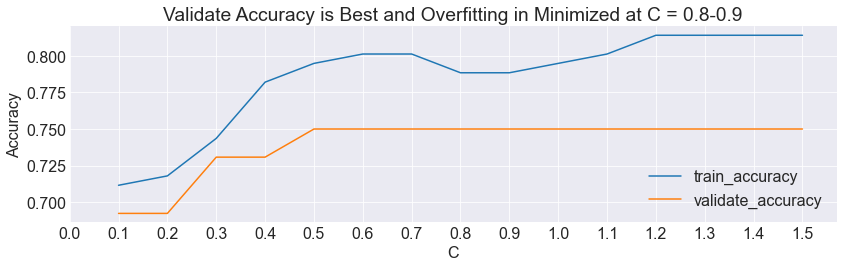

In [292]:
metrics = []

# loop through different values of C
for c in np.arange(0.1, 1.6, 0.1):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_bow_tfidf_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_bow_tfidf_train, y_train)
    validate_accuracy = logit.score(X_bow_tfidf_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.6, 0.1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.8-0.9')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

No change in validate accuracy and level of overfit from 0.8 to 0.9

train_accuracy  validate_accuracy  difference
C                                                   
0.775        0.794872               0.75       0.045
0.800        0.788462               0.75       0.038
0.825        0.788462               0.75       0.038
0.850        0.788462               0.75       0.038
0.875        0.788462               0.75       0.038
0.900        0.788462               0.75       0.038
0.925        0.794872               0.75       0.045

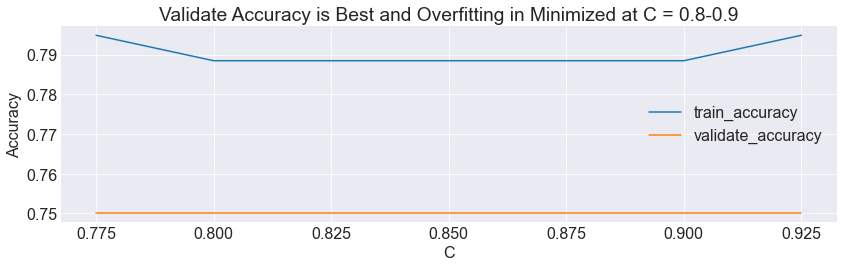

In [291]:
metrics = []

# loop through different values of C
for c in np.arange(0.775, 0.950, 0.025):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_bow_tfidf_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_bow_tfidf_train, y_train)
    validate_accuracy = logit.score(X_bow_tfidf_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.775, 0.950, 0.025))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.8-0.9')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

No difference from 0.8 to 0.9

In [296]:
# make and save a model here to use on test
# define the thing
logit = LogisticRegression(C=0.8, random_state=123)

# fit the thing (remember only fit on training data)
logit.fit(X_bow_tfidf_train, y_train)

# use the thing (calculate accuracy)
train_accuracy = logit.score(X_bow_tfidf_train, y_train)
validate_accuracy = logit.score(X_bow_tfidf_validate, y_validate)
test_accuracy = logit.score(X_bow_tfidf_test, y_test)

(train_accuracy, validate_accuracy, test_accuracy)

(0.7884615384615384, 0.75, 0.6981132075471698)

In [308]:
print(f'The best-performing model had an accuracy of {test_accuracy:.2f}% on out-of-sample data and outperformed baseline by {test_accuracy - baseline_accuracy:.2f}%.')

The best-performing model had an accuracy of 0.70% on out-of-sample data and outperformed baseline by 0.31%.
